# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
# Import the dataset
dataset_path= "C:/Users/linad/OneDrive/Documentos/Project2/Mental_Health_State_Prediction/Data/Raw_data/Dataset_Patient_Characteristics_Survey__PCS___2019.csv"

dataset = pd.read_csv(dataset_path, sep=";")
dataset.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Living Situation,...,No Insurance,Unknown Insurance Coverage,Medicaid Insurance,Medicaid Managed Insurance,Medicare Insurance,Private Insurance,Child Health Plus Insurance,Other Insurance,Criminal Justice Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,OTHER LIVING SITUATION,...,NO,False,YES,NO,NO,NO,NO,NO,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,PRIVATE RESIDENCE,...,NO,False,YES,YES,NO,NO,NO,NO,NO,142


In [3]:
#List the columns name
dataset.columns

Index(['Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
       'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
       'Living Situation', 'Household Composition', 'Preferred Language',
       'Religious Preference', 'Veteran Status', 'Employment Status',
       'Number Of Hours Worked Each Week', 'Education Status',
       'Special Education Services', 'Mental Illness',
       'Intellectual Disability', 'Autism Spectrum',
       'Other Developmental Disability', 'Alcohol Related Disorder',
       'Drug Substance Disorder', 'Opioid Related Disorder',
       'Mobility Impairment Disorder', 'Hearing Impairment',
       'Visual Impairment', 'Speech Impairment', 'Hyperlipidemia',
       'High Blood Pressure', 'Diabetes', 'Obesity', 'Heart Attack', 'Stroke',
       'Other Cardiac', 'Pulmonary Asthma', 'Alzheimer or Dementia',
       'Kidney Disease', 'Liver Disease', 'Endocrine Condition',
       'Neurological Condition', 'Traumatic Brain Injury', 'J

In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196102 entries, 0 to 196101
Data columns (total 76 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   Survey Year                       196102 non-null  int64 
 1   Program Category                  196102 non-null  object
 2   Region Served                     196102 non-null  object
 3   Age Group                         196102 non-null  object
 4   Sex                               196102 non-null  object
 5   Transgender                       196102 non-null  object
 6   Sexual Orientation                196102 non-null  object
 7   Hispanic Ethnicity                196102 non-null  object
 8   Race                              196102 non-null  object
 9   Living Situation                  196102 non-null  object
 10  Household Composition             196102 non-null  object
 11  Preferred Language                196102 non-null  object
 12  Re

In [5]:
#Check if there is na values
print(dataset.isna().sum())

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64


1. We have no Null value or NA values.
2. Also, we have 196102 record. The Mental Illness columns has 3 possible outcome: Yes, No and UNKNOWN. "UNKNOW" is not really important. 
3. So, it is interessting to see how many "UNKNOW" do we have in the dataset.

In [49]:
#Count the number of "Unknown" in the "Mentall illness" column
dataset.loc[dataset["Mental Illness"] == "UNKNOWN"].count()

Survey Year                       1985
Program Category                  1985
Region Served                     1985
Age Group                         1985
Sex                               1985
                                  ... 
Private Insurance                 1985
Child Health Plus Insurance       1985
Other Insurance                   1985
Criminal Justice Status           1985
Three Digit Residence Zip Code    1985
Length: 76, dtype: int64

Only 1985 out of 196102 record as "UNKNOWN" as Mentall Illness diagnosis. This means that it can be removed.

In [6]:
#Remove rows with "UNKNOWN" in "Mental Illness" columns
dataset = dataset.drop(dataset.loc[dataset['Mental Illness'] == "UNKNOWN"].index)

#Check
dataset.loc[dataset["Mental Illness"] == "UNKNOWN"].count()

Survey Year                       0
Program Category                  0
Region Served                     0
Age Group                         0
Sex                               0
                                 ..
Private Insurance                 0
Child Health Plus Insurance       0
Other Insurance                   0
Criminal Justice Status           0
Three Digit Residence Zip Code    0
Length: 76, dtype: int64

Total number of columns: 76, and most of the columns have more than 3 responses possible --> Too much to work with.

Let's see if we can reduce the number of categories per columns, then features.

Workflow:
1. Group the columns by their corresponding caterogies (Demographic, clinical, social & Insurrance) with respect to the target "Mental Illness"
2. Feature evaluation: check the importance of each feature with respect to their group
3. in each group/class, aggregate features that are:
    a. Highly correlated with each other (kind of redudant)
    b. And have similar relationship with the target "Mental Illness"
4. finally, build the final feature set (new dataset with fewer columns)

In [7]:
# Define feature groups: features devided into 4 groups

feature_groups = {
    #Demographic group
    "Demographic": [
                    'Survey Year', 'Program Category', 'Region Served', 'Age Group', 'Sex',
                    'Transgender', 'Sexual Orientation', 'Hispanic Ethnicity', 'Race',
                    'Preferred Language', 'Religious Preference', 'Veteran Status',
                    'Three Digit Residence Zip Code'
                   ],

    #Clinical
    "Clinical": [
                    # Mental
                    'Mental Illness', 'Intellectual Disability', 'Autism Spectrum',
                    'Other Developmental Disability', 'Alcohol Related Disorder',
                    'Drug Substance Disorder', 'Opioid Related Disorder',
                    'Serious Mental Illness', 'Principal Diagnosis Class', 'Additional Diagnosis Class',
                    #Physical
                    'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment',
                    'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes',
                    'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
                    'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
                    'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury',
                    'Joint Disease', 'Cancer', 'Other Chronic Med Condition',
                    'No Chronic Med Condition', 'Unknown Chronic Med Condition',
                    #Substance use
                    'Cannabis Recreational Use', 'Cannabis Medicinal Use', 'Smokes',
                    'Received Smoking Medication', 'Received Smoking Counseling',
                    'Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service'
                ],

    # Social
    "Social": [
                'Living Situation', 'Household Composition', 'Employment Status',
                'Number Of Hours Worked Each Week', 'Education Status',
                'Special Education Services', 'Criminal Justice Status',
                'SSI Cash Assistance', 'SSDI Cash Assistance', 'Veterans Disability Benefits',
                'Veterans Cash Assistance', 'Public Assistance Cash Program',
                'Other Cash Benefits'
              ],

    # Insurance
    "Insurance": [
                   'Medicaid and Medicare Insurance', 'No Insurance',
                   'Unknown Insurance Coverage', 'Medicaid Insurance',
                   'Medicaid Managed Insurance', 'Medicare Insurance',
                   'Private Insurance', 'Child Health Plus Insurance', 'Other Insurance'
                 ]
    }



In [8]:
data_group={}
for group, features in feature_groups.items():
    data_group[group] = dataset[features]

Demographic = data_group["Demographic"]
Clinical = data_group["Clinical"]
Social = data_group['Social']
Insurance = data_group["Insurance"]
target = pd.DataFrame({"Mental Illness": dataset["Mental Illness"]})

# EDA Demographic Group

In [9]:
Demographic.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Preferred Language,Religious Preference,Veteran Status,Three Digit Residence Zip Code
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,ENGLISH,DATA NOT AVAILABLE,NO,117
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,100
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,120
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,ENGLISH,DATA NOT AVAILABLE,NO,114
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,142


Features behavior with respect to the target

I will be using the frequency tables to evaluate how the features in the Demographic Group behave. This will allow us to see if their is any relationship between features.

Important: research on frequency tables

https://heartbeat.comet.ml/exploratory-data-analysis-eda-for-categorical-data-870b37a79b65

In [13]:
# new demographic group dataset (I add the target)
new_dem_grp = Demographic.copy()
new_dem_grp["Mental Illness"] = target["Mental Illness"].values
new_dem_grp.head()

,Survey Year,Program Category,Region Served,Age Group,Sex,Transgender,Sexual Orientation,Hispanic Ethnicity,Race,Preferred Language,Religious Preference,Veteran Status,Three Digit Residence Zip Code,Mental Illness
0,2019,OUTPATIENT,LONG ISLAND REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"YES, HISPANIC/LATINO",WHITE ONLY,ENGLISH,DATA NOT AVAILABLE,NO,117,YES
1,2019,OUTPATIENT,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,100,YES
2,2019,OUTPATIENT,HUDSON RIVER REGION,ADULT,MALE,"NO, NOT TRANSGENDER",LESBIAN OR GAY,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,I BELONG TO A FORMAL RELIGIOUS GROUP,NO,120,YES
3,2019,RESIDENTIAL,NEW YORK CITY REGION,ADULT,MALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,UNKNOWN,OTHER,ENGLISH,DATA NOT AVAILABLE,NO,114,YES
4,2019,OUTPATIENT,WESTERN REGION,ADULT,FEMALE,"NO, NOT TRANSGENDER",STRAIGHT OR HETEROSEXUAL,"NO, NOT HISPANIC/LATINO",WHITE ONLY,ENGLISH,"I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS",NO,142,YES


In [14]:
# frequency_table  function
def frequency_table(data: pd.DataFrame, target_col: str, feature_cols):
    freq_tab = pd.crosstab(index = data[target_col], columns = data[feature_cols], margins = True)
    rel_table = round(freq_tab/freq_tab.loc["All"], 2)
    return freq_tab, rel_table

Multivariate analysis

In [15]:
#analysis Program Category column
#Survey year column to be dropped

for col in new_dem_grp.columns[1:-2]:
    freq, rel = frequency_table(new_dem_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Program Category  EMERGENCY  INPATIENT  OUTPATIENT  RESIDENTIAL  SUPPORT  \
Mental Illness                                                             
NO                      237         49        3624          315     1352   
YES                    2980       8880      128552        29742    18386   
All                    3217       8929      132176        30057    19738   

Program Category     All  
Mental Illness            
NO                  5577  
YES               188540  
All               194117  
------------------------------------------------------------------------------------------


Two-way frequency table
Region Served   CENTRAL NY REGION  HUDSON RIVER REGION  LONG ISLAND REGION  \
Mental Illness                                                               
NO                            476                  785                 700   
YES                         21573                26274               14533   
All                         220

We can see that we have huge imbalance in every columns: more "Mental Illness" with YES than NO

So, it is important to investigate at column level to see if changing&reducing the number of categories in columns can diminish the imbalance problem.

make a "before vs after" visual compairison using Bar plots

#### Categories smart aggregation

In [16]:
# Functions defintion

# Program Category
def aggregate_program_category(df):
    "This function aggregates the initial 5 categories into 3"
    return df['Program Category'].replace({
                                            'EMERGENCY': 'CRISIS/INPATIENT',
                                            'INPATIENT': 'CRISIS/INPATIENT',
                                            'OUTPATIENT': 'OUTPATIENT',
                                            'RESIDENTIAL': 'COMMUNITY/SUPPORTIVE',
                                            'SUPPORT': 'COMMUNITY/SUPPORTIVE'
                                        })

# Region Served
def aggregate_region_served(df):
    "This function aggregates the initial 5 categories into 3"
    return df['Region Served'].replace({
                                        'NEW YORK CITY REGION': 'NEW YORK CITY',
                                        'LONG ISLAND REGION': 'DOWNSTATE',
                                        'HUDSON RIVER REGION': 'DOWNSTATE',
                                        'CENTRAL NY REGION': 'UPSTATE',
                                        'WESTERN REGION': 'UPSTATE'
                                    })

# Transgender
def aggregate_transgender(df):
    "This function aggregates the initial 4 categories into 2"
    return df['Transgender'].replace({
                                    'NO, NOT TRANSGENDER': 'CISGENDER',
                                    'YES, TRANSGENDER': 'TRANSGENDER/UNKNOWN',
                                    "CLIENT DIDN'T ANSWER": 'TRANSGENDER/UNKNOWN',
                                    'UNKNOWN': 'TRANSGENDER/UNKNOWN'
                                })

# Sexual Orientation
def aggregate_sexual_orientation(df):
    "This function aggregates the initial 6 categories into 3"
    return df['Sexual Orientation'].replace({
                                            'STRAIGHT OR HETEROSEXUAL': 'HETEROSEXUAL',
                                            'LESBIAN OR GAY': 'LGBTQ+',
                                            'BISEXUAL': 'LGBTQ+',
                                            'OTHER': 'LGBTQ+',
                                            'CLIENT DID NOT ANSWER': 'UNKNOWN',
                                            'UNKNOWN': 'UNKNOWN'
                                        })

# Hispanic Ethnicity
def aggregate_hispanic_ethnicity(df):
    "This function improves the interpretability"
    return df['Hispanic Ethnicity'].replace({
                                            'YES, HISPANIC/LATINO': 'HISPANIC',
                                            'NO, NOT HISPANIC/LATINO': 'NON-HISPANIC',
                                            'UNKNOWN': 'UNKNOWN'
                                        })

# Race
def aggregate_race(df):
    "This function aggregates the initial 5 categories into 4"
    return df['Race'].replace({
                                'WHITE ONLY': 'WHITE',
                                'BLACK ONLY': 'BLACK',
                                'MULTI-RACIAL': 'OTHER/MULTIRACIAL',
                                'OTHER': 'OTHER/MULTIRACIAL',
                                'UNKNOWN RACE': 'UNKNOWN'
                            })

# Preferred Language
def aggregate_preferred_language(df):
    "This function aggregates the initial categories into 3"
    return df['Preferred Language'].replace({
                                            'ENGLISH': 'ENGLISH',
                                            'UNKNOWN': 'UNKNOWN'
                                        }).where(df['Preferred Language'].isin(['ENGLISH', 'UNKNOWN']), 'OTHER LANGUAGE')


# Religious Preference
def aggregate_religious_preference(df):
    return df['Religious Preference'].replace({
                                                'I BELONG TO A FORMAL RELIGIOUS GROUP': 'RELIGIOUS',
                                                'I CONSIDER MYSELF SPIRITUAL, BUT NOT RELIGIOUS': 'SPIRITUAL/NON-RELIGIOUS',
                                                'I DO NOT HAVE A FORMAL RELIGION, NOR AM I A SPIRITUAL PERSON': 'SPIRITUAL/NON-RELIGIOUS',
                                                'DATA NOT AVAILABLE': 'UNKNOWN'
                                            })

# Veteran Status
def aggregate_veteran_status(df):
    return df['Veteran Status'].replace({
                                            'YES': 'VETERAN',
                                            'NO': 'NON-VETERAN/UNKNOWN',
                                            'UNKNOWN': 'NON-VETERAN/UNKNOWN'
                                        })


In [17]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Program Category'] = aggregate_program_category(df)
    df['Region Served'] = aggregate_region_served(df)
    df['Transgender'] = aggregate_transgender(df)
    df['Sexual Orientation'] = aggregate_sexual_orientation(df)
    df['Hispanic Ethnicity'] = aggregate_hispanic_ethnicity(df)
    df['Race'] = aggregate_race(df)
    df['Preferred Language'] = aggregate_preferred_language(df)
    df['Religious Preference'] = aggregate_religious_preference(df)
    df['Veteran Status'] = aggregate_veteran_status(df)
    return df


In [18]:
# Apply to demographic dataset
Demographic_cat_agg = apply_all_aggregations(new_dem_grp)

# check unique values after aggregation
for col in Demographic_cat_agg.columns:
    print(f"{col} → {Demographic_cat_agg[col].unique()}")


Survey Year → [2019]
Program Category → ['OUTPATIENT' 'COMMUNITY/SUPPORTIVE' 'CRISIS/INPATIENT']
Region Served → ['DOWNSTATE' 'NEW YORK CITY' 'UPSTATE']
Age Group → ['ADULT' 'CHILD' 'UNKNOWN']
Sex → ['MALE' 'FEMALE' 'UNKNOWN']
Transgender → ['CISGENDER' 'TRANSGENDER/UNKNOWN']
Sexual Orientation → ['HETEROSEXUAL' 'LGBTQ+' 'UNKNOWN']
Hispanic Ethnicity → ['HISPANIC' 'NON-HISPANIC' 'UNKNOWN']
Race → ['WHITE' 'OTHER/MULTIRACIAL' 'BLACK' 'UNKNOWN']
Preferred Language → ['ENGLISH' 'OTHER LANGUAGE' 'UNKNOWN']
Religious Preference → ['UNKNOWN' 'RELIGIOUS' 'SPIRITUAL/NON-RELIGIOUS']
Veteran Status → ['NON-VETERAN/UNKNOWN' 'VETERAN']
Three Digit Residence Zip Code → [117 100 120 114 142 140 999 147 112 116 107 109 105 131 145 144 129 132
 888 139 130 121 141 124 136 103 134 135 133 143 115 104 113 148 137 106
 777 128 119 108 111 126 123 125 138 122 146 110 127 149 101 118]
Mental Illness → ['YES' 'NO']


In [19]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Demographic_cat_agg.columns[1:-2]:
    freq, rel = frequency_table(Demographic_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Program Category  COMMUNITY/SUPPORTIVE  CRISIS/INPATIENT  OUTPATIENT     All
Mental Illness                                                              
NO                                1667               286        3624    5577
YES                              48128             11860      128552  188540
All                              49795             12146      132176  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Region Served   DOWNSTATE  NEW YORK CITY  UPSTATE     All
Mental Illness                                           
NO                   1485           2447     1645    5577
YES                 40807          93231    54502  188540
All                 42292          95678    56147  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Age Group        ADULT  CHILD  UNKNOWN     All
Mental Illness      

#### Visual compairison

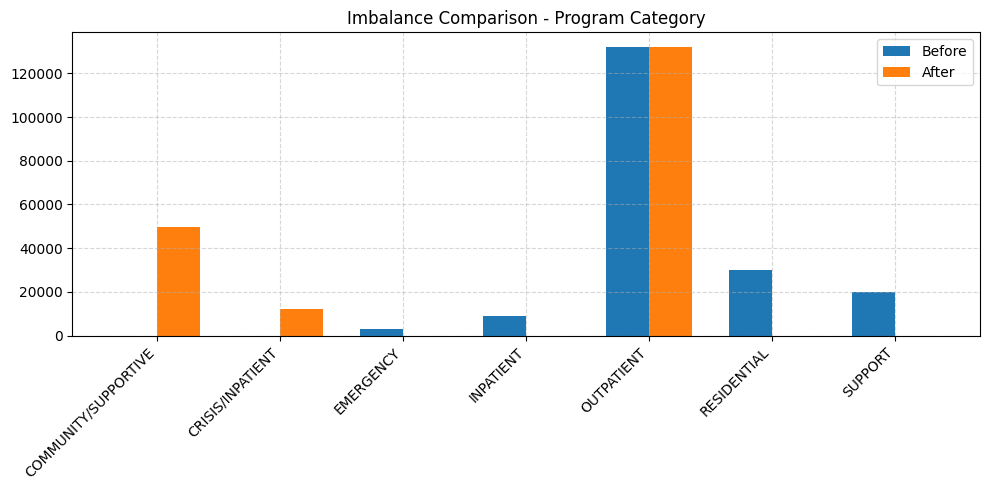

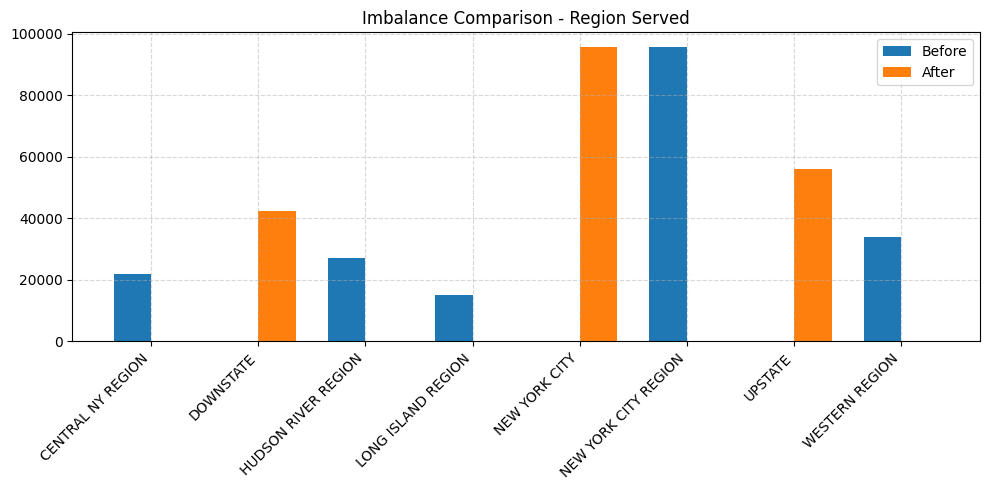

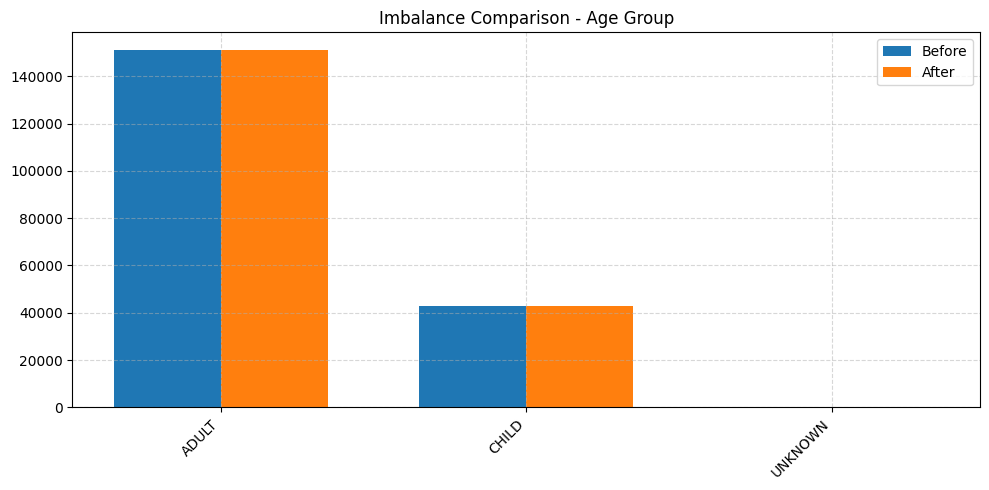

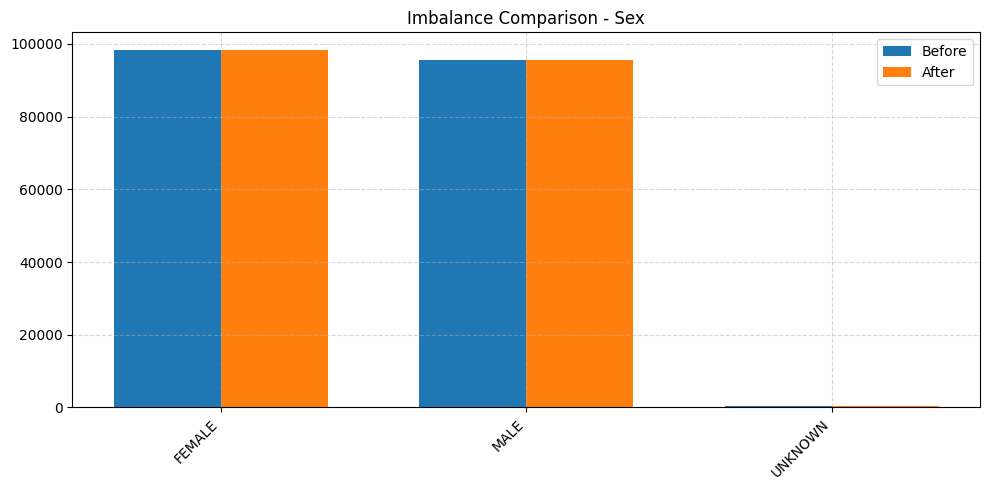

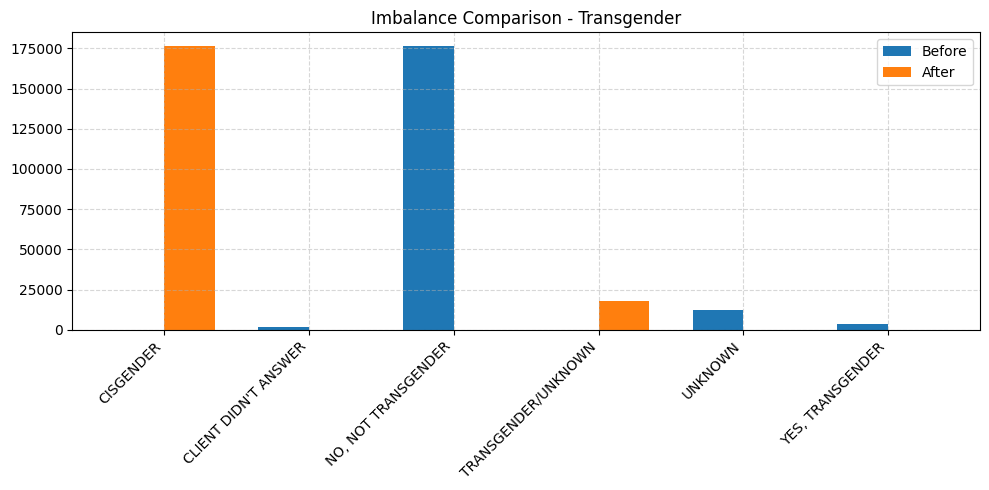

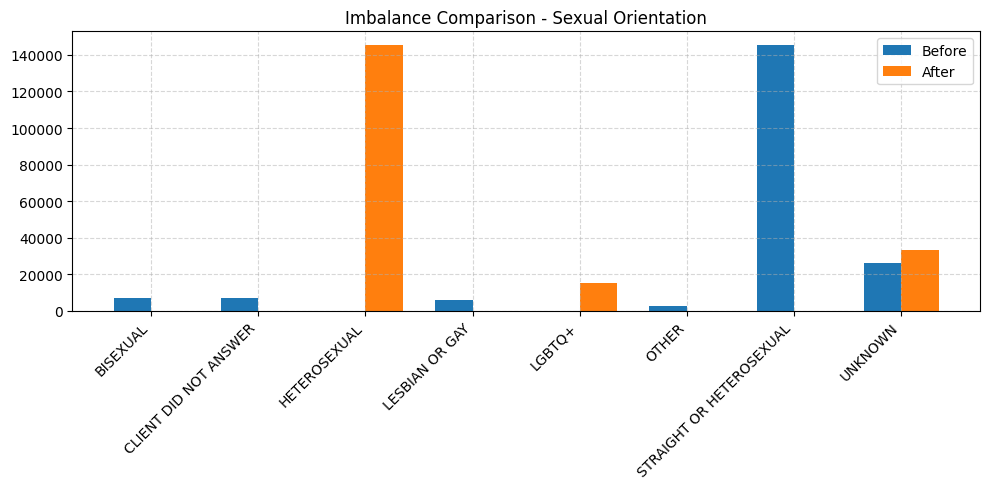

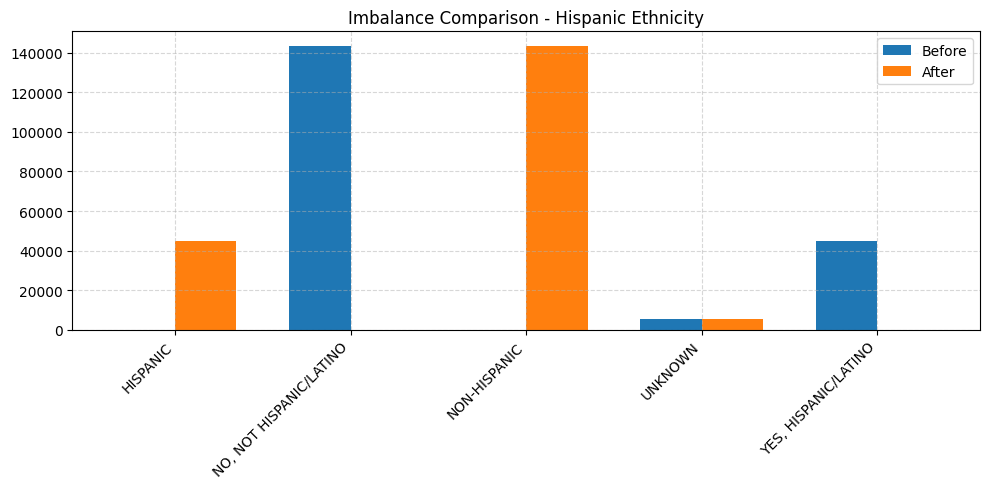

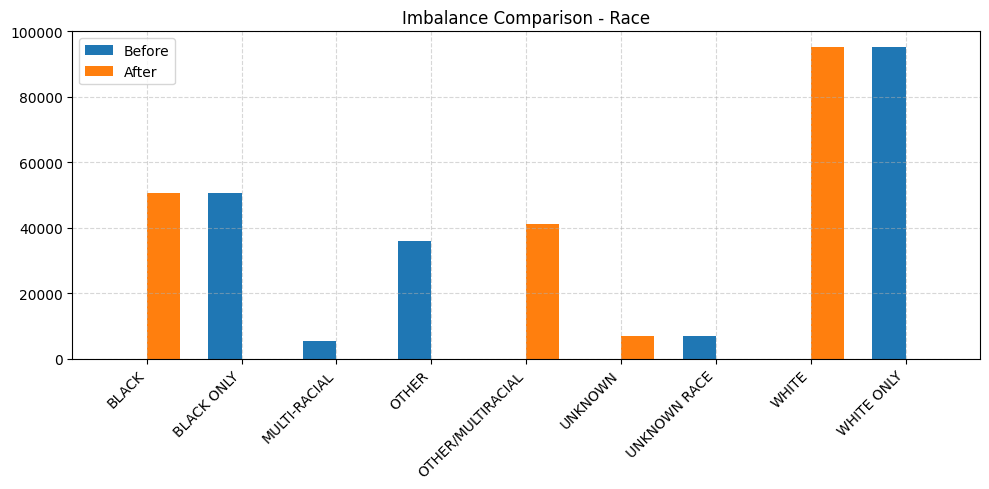

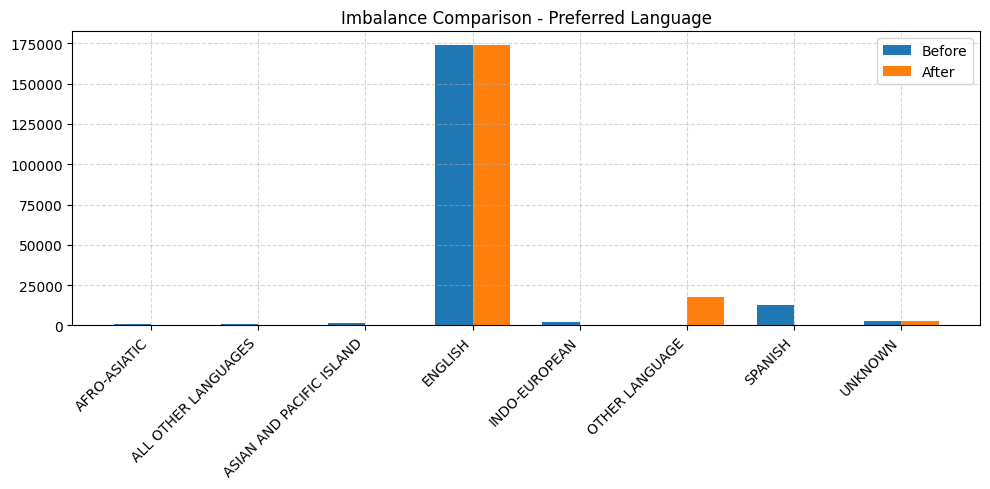

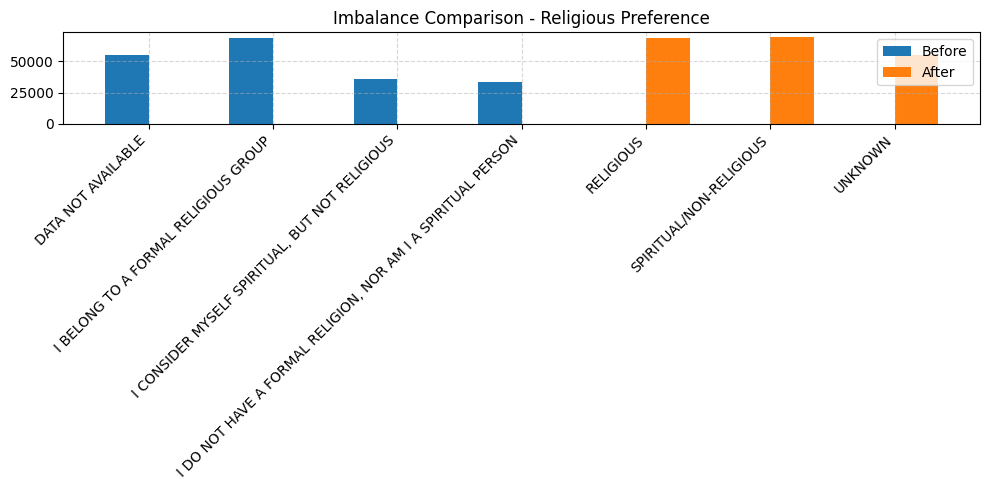

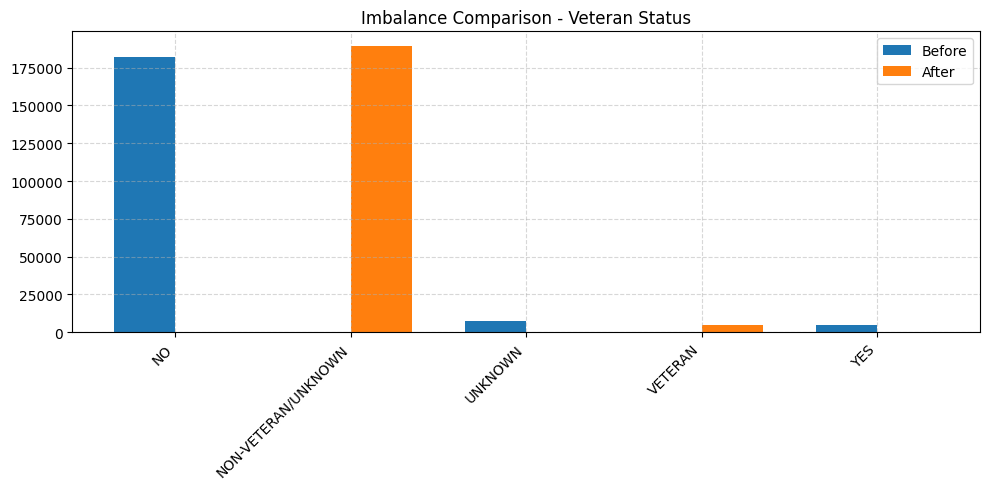

In [20]:
# Using Matplotlib

# Example list of columns you want to compare
'''columns_to_compare = [
    'Program Category', 'Region Served', 'Age Group', 'Sex', 'Transgender',
    'Sexual Orientation', 'Hispanic Ethnicity', 'Race', 'Preferred Language',
    'Religious Preference', 'Veteran Status'
]'''

columns_to_compare = new_dem_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_dem_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Demographic_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


In [21]:
#Using Plotly
for col in columns_to_compare:
    original_counts = new_dem_grp[col].value_counts().sort_index()
    aggregated_counts = Demographic_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis_tickangle=-45,
        xaxis_title=col,
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()


1. We can further reduce the imbalace and/or reduce the number of features by merging features highly correlated and/or are kind of redudant. 

2. then use Chi-square test if we need to further reduce the number of features by selecting the ones with most effect size

3. The Three digit columns can be removed

#### Feature Enginnering: building new feature by merging the some previous ones

In [22]:
def gender_identity_group(row):
    sex = row['Sex']
    trans = row['Transgender']
    orient = row['Sexual Orientation']
    
    if sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER' and orient == 'HETEROSEXUAL':
        return 'Cis-Hetero'
    elif sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER' and orient == 'LGBTQ+':
        return 'Cis-LGBTQ+'
    elif sex in ['MAN', 'WOMAN'] and trans == 'CISGENDER':
        return 'Cis-Unknown'
    elif sex in ['MAN', 'WOMAN'] and trans == 'TRANSGENDER/UNKNOWN':
        return 'Non-Cisgender'
    else:
        return 'Unclear'

def cultural_group(row):
    race = row['Race']
    lang = row['Preferred Language']
    eth = row['Hispanic Ethnicity']
    
    if race == 'WHITE' and lang == 'ENGLISH' and eth == 'NON-HISPANIC':
        return 'Majority US'
    elif eth == 'HISPANIC':
        return 'Hispanic'
    elif race == 'MULTI-RACIAL':
        return 'Multiracial'
    elif lang not in ['ENGLISH', 'UNKNOWN']:
        return 'Immigrant/Other Lang'
    else:
        return 'Unknown'


#Apply
Demographic_cat_agg_feat_merg = Demographic_cat_agg.copy()

Demographic_cat_agg_feat_merg['Gender Identity Group'] = Demographic_cat_agg_feat_merg.apply(gender_identity_group, axis=1)

Demographic_cat_agg_feat_merg['Cultural Group'] = Demographic_cat_agg_feat_merg.apply(cultural_group, axis=1)

#'Three Digital Residence Zip Code'
Demographic_cat_agg_feat_merg.drop(columns=['Sex', 'Transgender', 'Sexual Orientation', 'Race', 'Preferred Language', 'Hispanic Ethnicity'], inplace=True)

Demographic_cat_agg_feat_merg.head()


,Survey Year,Program Category,Region Served,Age Group,Religious Preference,Veteran Status,Three Digit Residence Zip Code,Mental Illness,Gender Identity Group,Cultural Group
0,2019,OUTPATIENT,DOWNSTATE,ADULT,UNKNOWN,NON-VETERAN/UNKNOWN,117,YES,Unclear,Hispanic
1,2019,OUTPATIENT,NEW YORK CITY,ADULT,RELIGIOUS,NON-VETERAN/UNKNOWN,100,YES,Unclear,Majority US
2,2019,OUTPATIENT,DOWNSTATE,ADULT,RELIGIOUS,NON-VETERAN/UNKNOWN,120,YES,Unclear,Majority US
3,2019,COMMUNITY/SUPPORTIVE,NEW YORK CITY,ADULT,UNKNOWN,NON-VETERAN/UNKNOWN,114,YES,Unclear,Unknown
4,2019,OUTPATIENT,UPSTATE,ADULT,SPIRITUAL/NON-RELIGIOUS,NON-VETERAN/UNKNOWN,142,YES,Unclear,Majority US


# EDA CLINICAL GROUP

In [22]:
#Clinical
# new  group dataset (I add the target)
new_clin_grp = Clinical.copy()
new_clin_grp["Mental Illness"] = target["Mental Illness"].values
new_clin_grp.head()

,Mental Illness,Intellectual Disability,Autism Spectrum,Other Developmental Disability,Alcohol Related Disorder,Drug Substance Disorder,Opioid Related Disorder,Serious Mental Illness,Principal Diagnosis Class,Additional Diagnosis Class,...,No Chronic Med Condition,Unknown Chronic Med Condition,Cannabis Recreational Use,Cannabis Medicinal Use,Smokes,Received Smoking Medication,Received Smoking Counseling,Alcohol 12m Service,Opioid 12m Service,Drug/Substance 12m Service
0,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,UNKNOWN,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
1,YES,NO,NO,NO,NO,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,YES,False,NO,NO,NO,NO,NO,NO,NO,NO
2,YES,NO,NO,YES,NO,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,YES,NO,YES,NO,NO,NO,NO,NO
3,YES,NO,NO,NO,YES,YES,NO,YES,MENTAL ILLNESS,SUBSTANCE-RELATED AND ADDICTIVE DISORDERS,...,YES,False,NO,NO,YES,NO,YES,YES,NO,NO
4,YES,NO,NO,NO,YES,NO,NO,YES,MENTAL ILLNESS,MENTAL ILLNESS,...,NO,False,NO,NO,YES,NO,YES,NO,NO,NO


In [23]:
#analysis Program Category column
#Survey year column to be dropped

for col in new_clin_grp.columns[1:-2]:
    freq, rel = frequency_table(new_clin_grp, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()


Two-way frequency table
Intellectual Disability      NO  UNKNOWN    YES     All
Mental Illness                                         
NO                         5174      121    282    5577
YES                      158079    15727  14734  188540
All                      163253    15848  15016  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Autism Spectrum      NO  UNKNOWN   YES     All
Mental Illness                                
NO                 5313      100   164    5577
YES              168994    14429  5117  188540
All              174307    14529  5281  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Other Developmental Disability      NO  UNKNOWN   YES     All
Mental Illness                                               
NO                                5334      128   115    5577
YES                             167262   

### Categories smart aggregation

In [24]:
def aggregate_Principal_Diagnosis_Class(df):
    "This function aggregates the initial 6 categories into 4"
    return df['Principal Diagnosis Class'].replace({
                                            'MENTAL ILLNESS': 'MENTAL ILLNESS',
                                            'NOT MI - DEVELOPMENTAL DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - ORGANIC MENTAL DISORDER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - OTHER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'UNKNOWN': 'UNKNOWN'
                                        })



def aggregate_additional_Diagnosis_Class(df):
    "This function aggregates the initial 7 categories into 5"
    return df['Additional Diagnosis Class'].replace({
                                            'MENTAL ILLNESS': 'MENTAL ILLNESS',
                                            'NO ADDITIONAL DIAGNOSIS': 'NO ADDITIONAL DIAGNOSIS',
                                            'NOT MI - DEVELOPMENTAL DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - ORGANIC MENTAL DISORDER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'NOT MI - OTHER': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'SUBSTANCE-RELATED AND ADDICTIVE DISORDERS': 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER',
                                            'UNKNOWN': 'UNKNOWN'
                                        })



In [25]:
# Use all the aggregation funxtions into one
def apply_all_aggregations(df):
    df = df.copy()
    df['Principal Diagnosis Class'] = aggregate_Principal_Diagnosis_Class(df)
    df['Additional Diagnosis Class'] = aggregate_additional_Diagnosis_Class(df)
    return df


In [26]:
# Apply to demographic dataset
Clinical_cat_agg = apply_all_aggregations(new_clin_grp)

# check unique values after aggregation
for col in Clinical_cat_agg.columns:
    print(f"{col} → {Clinical_cat_agg[col].unique()}")


Mental Illness → ['YES' 'NO']
Intellectual Disability → ['NO' 'YES' 'UNKNOWN']
Autism Spectrum → ['NO' 'UNKNOWN' 'YES']
Other Developmental Disability → ['NO' 'YES' 'UNKNOWN']
Alcohol Related Disorder → ['NO' 'YES' 'UNKNOWN']
Drug Substance Disorder → ['NO' 'YES' 'UNKNOWN']
Opioid Related Disorder → ['NO' 'YES' 'UNKNOWN']
Serious Mental Illness → ['YES' 'NO' 'UNKNOWN']
Principal Diagnosis Class → ['MENTAL ILLNESS' 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
 'UNKNOWN']
Additional Diagnosis Class → ['UNKNOWN' 'MENTAL ILLNESS'
 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
 'NO ADDITIONAL DIAGNOSIS']
Mobility Impairment Disorder → ['NO' 'YES' 'UNKNOWN']
Hearing Impairment → ['NO' 'YES' 'UNKNOWN']
Visual Impairment → ['NO' 'YES' 'UNKNOWN']
Speech Impairment → ['NO' 'YES' 'UNKNOWN']
Hyperlipidemia → ['NO' 'YES' 'UNKNOWN']
High Blood Pressure → ['NO' 'YES' 'UNKNOWN']
Diabetes → ['NO' 'YES' 'UNKNOWN']
Obesity → ['NO' 'YES' 'UNKNOWN']
Heart Attack → ['NO' 'UNKNOWN' 'YE

In [27]:
#Let's check again the imbalace between "Yes" an "No" in the target column "Mental Illness"

for col in Clinical_cat_agg.columns[1:-2]:
    freq, rel = frequency_table(Clinical_cat_agg, "Mental Illness", col)
    print("Two-way frequency table")
    print(freq)
    #print("Two-way relative frequency table")
    #print(rel)
    print("------" * 15)
    print()
    print()

Two-way frequency table
Intellectual Disability      NO  UNKNOWN    YES     All
Mental Illness                                         
NO                         5174      121    282    5577
YES                      158079    15727  14734  188540
All                      163253    15848  15016  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Autism Spectrum      NO  UNKNOWN   YES     All
Mental Illness                                
NO                 5313      100   164    5577
YES              168994    14429  5117  188540
All              174307    14529  5281  194117
------------------------------------------------------------------------------------------


Two-way frequency table
Other Developmental Disability      NO  UNKNOWN   YES     All
Mental Illness                                               
NO                                5334      128   115    5577
YES                             167262   

#### Visual comparasion clinical variables

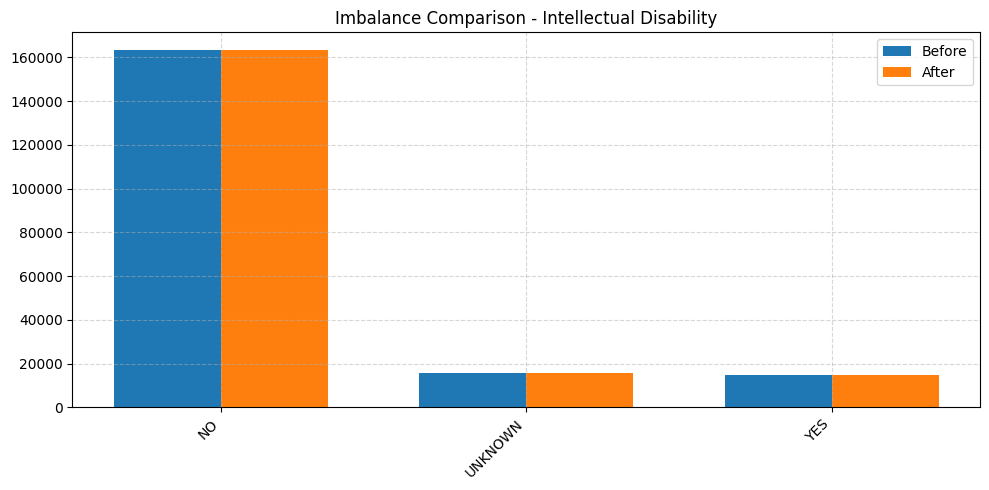

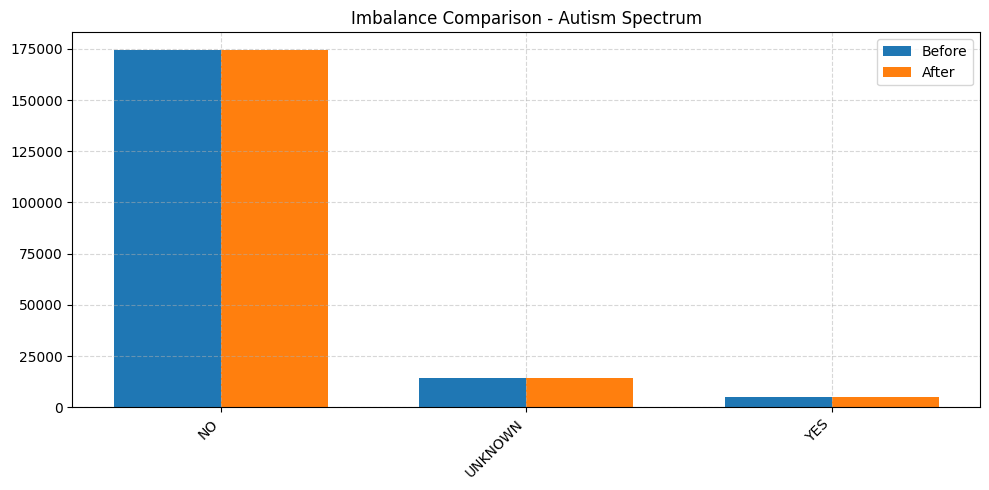

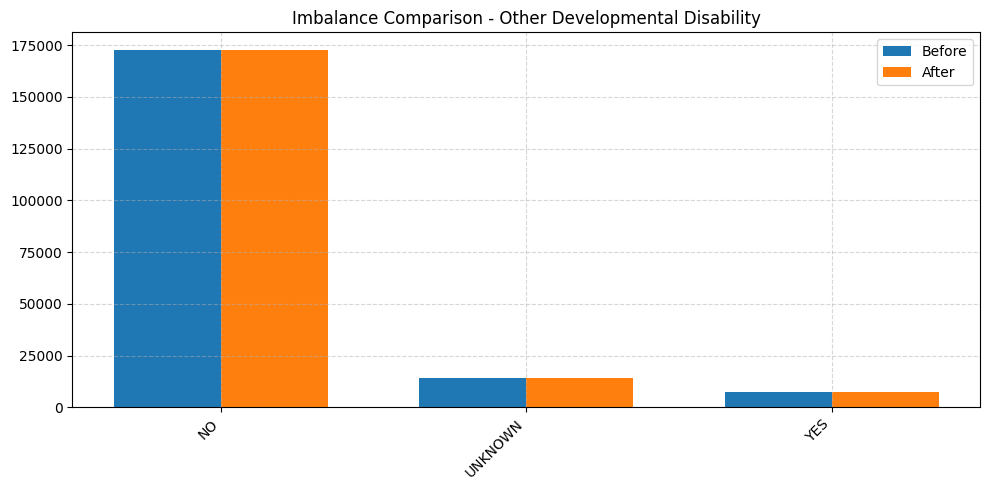

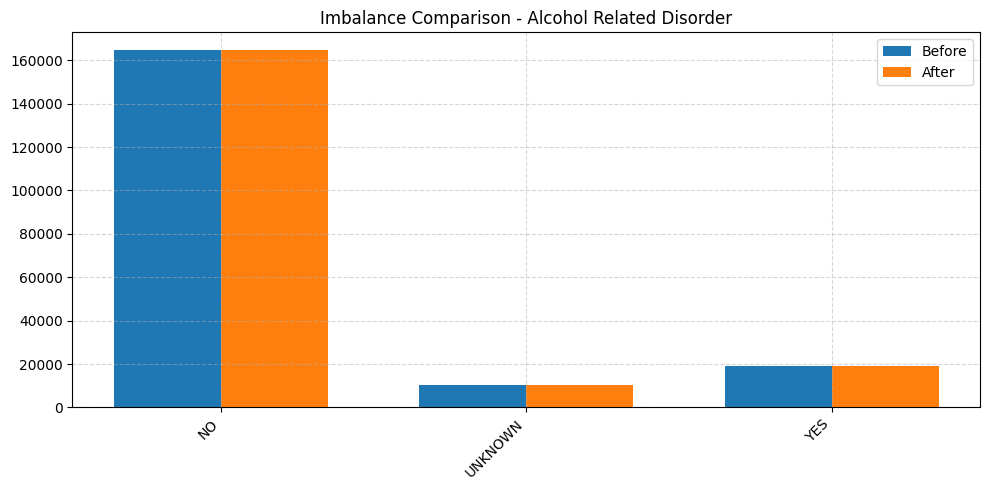

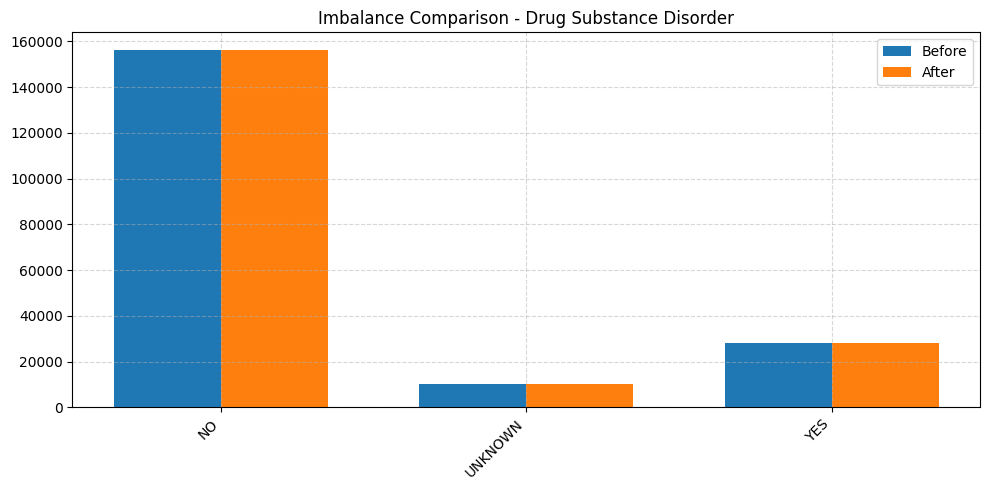

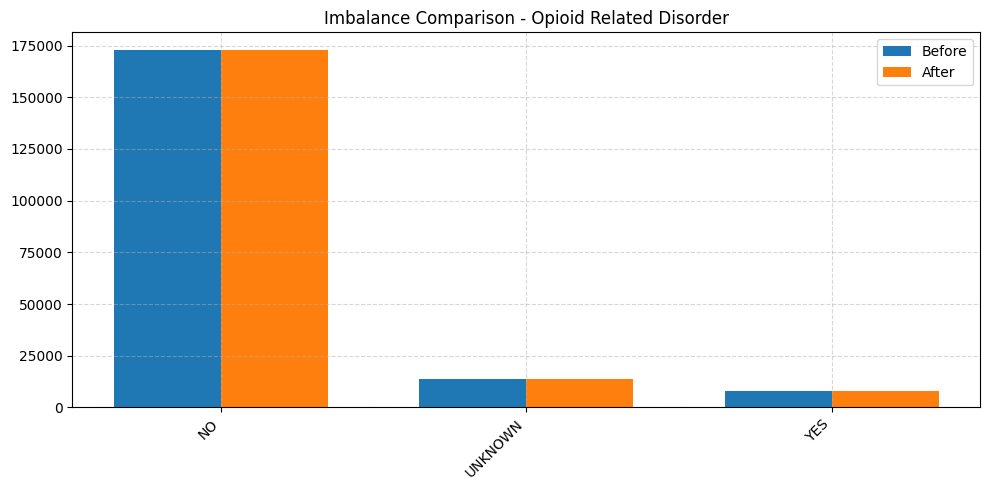

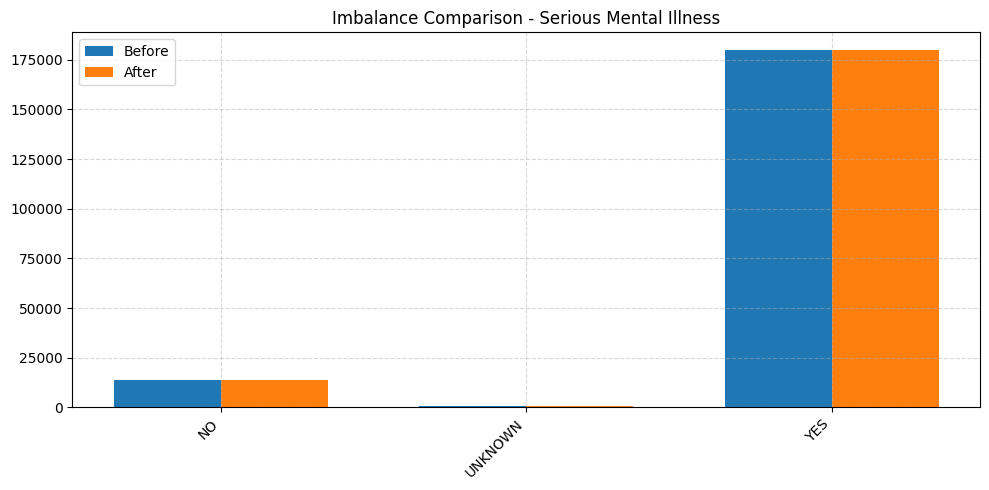

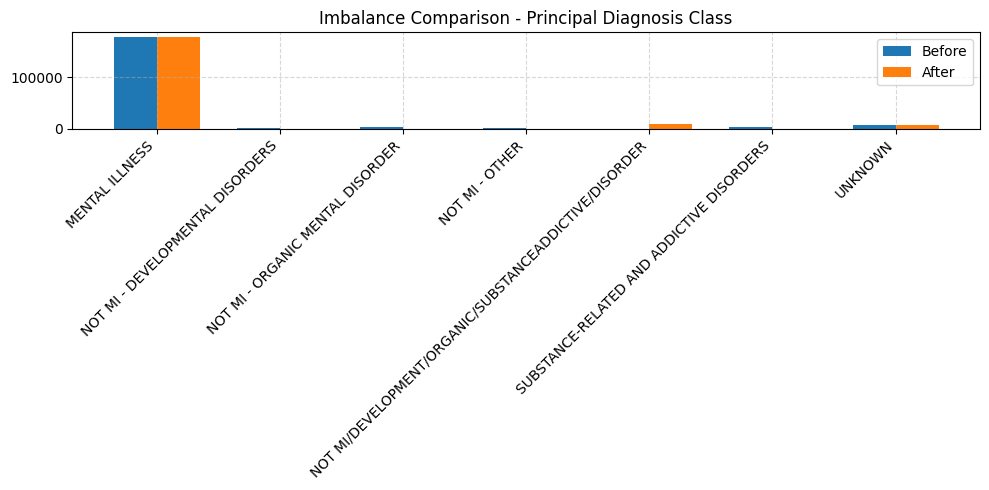

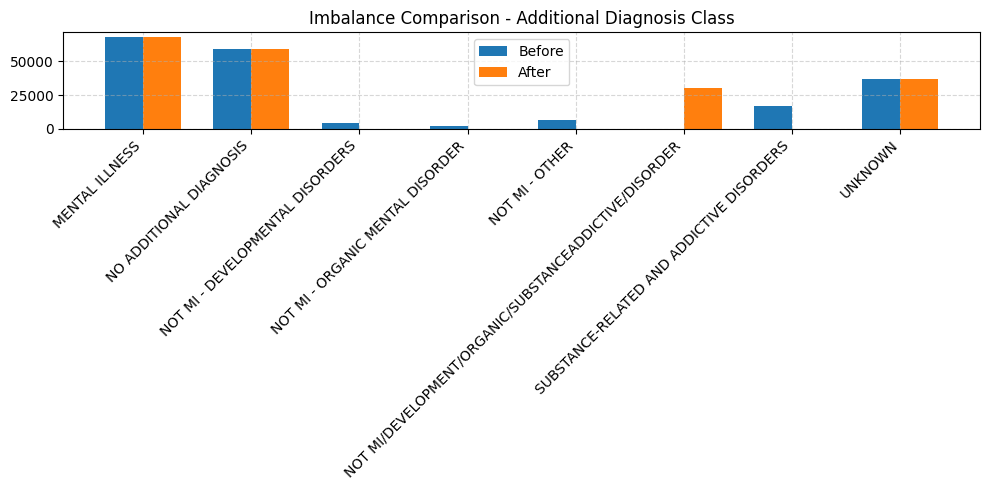

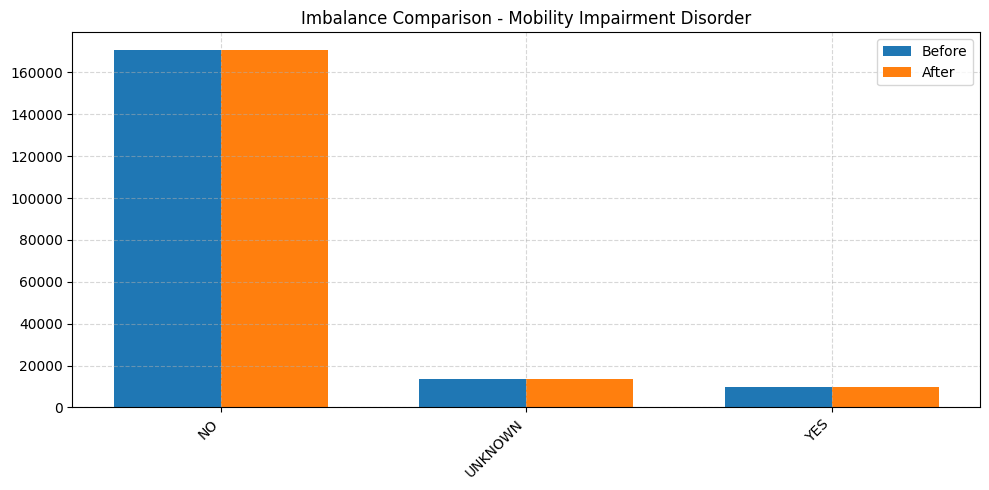

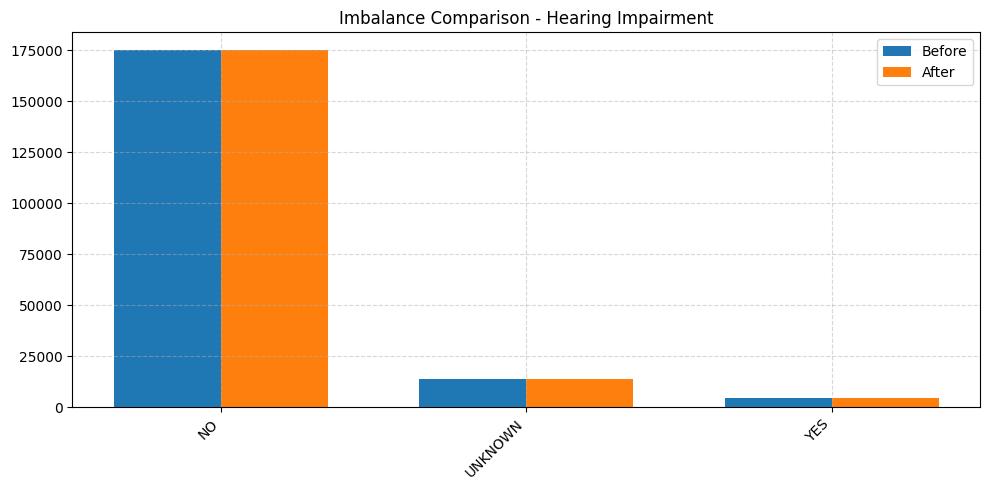

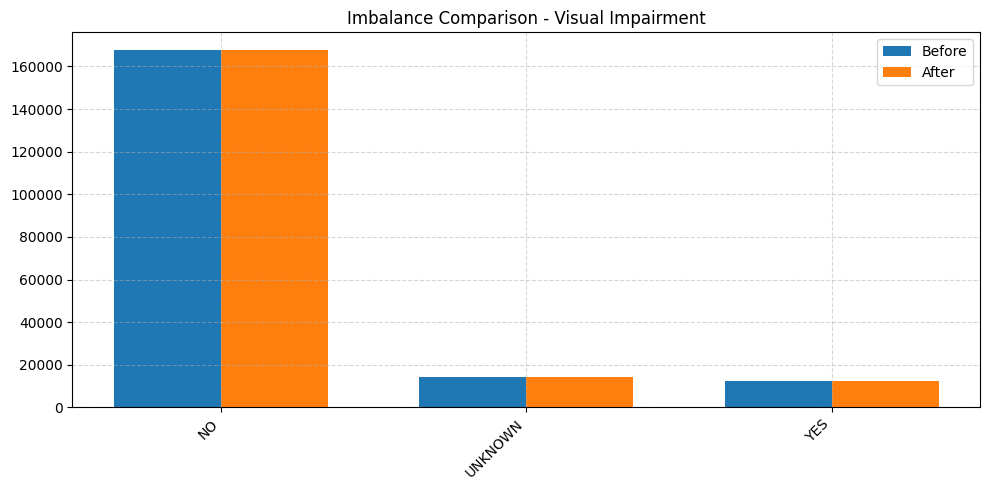

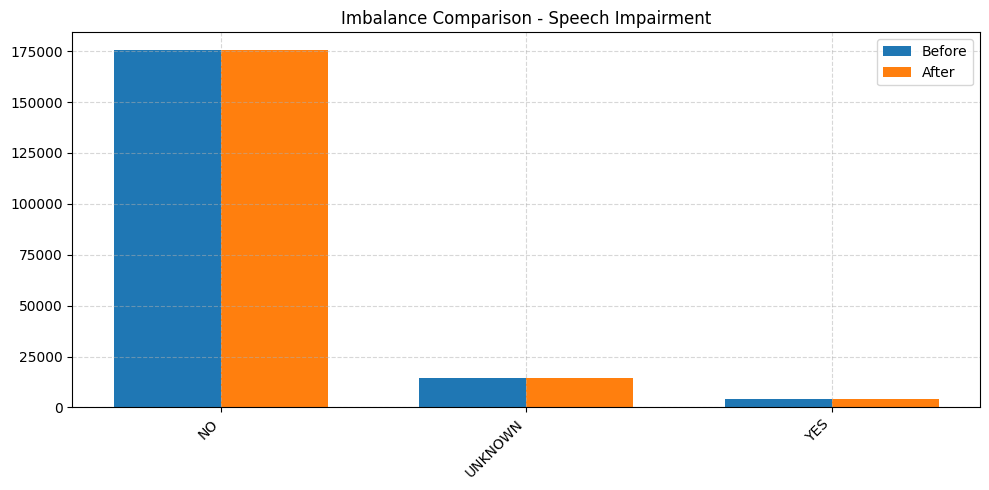

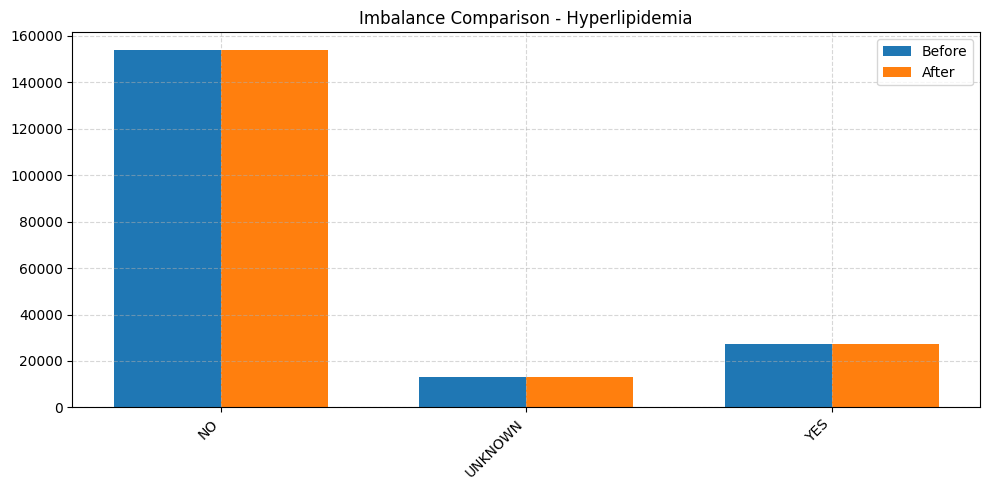

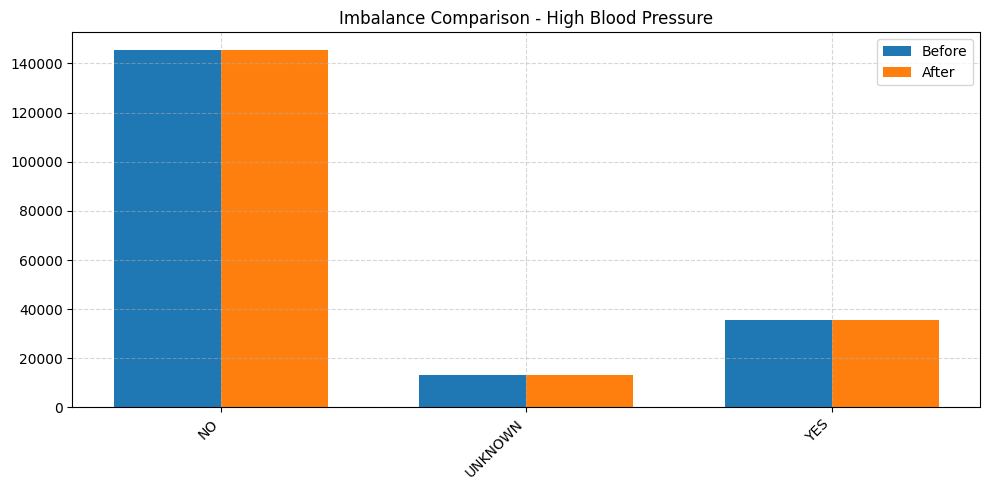

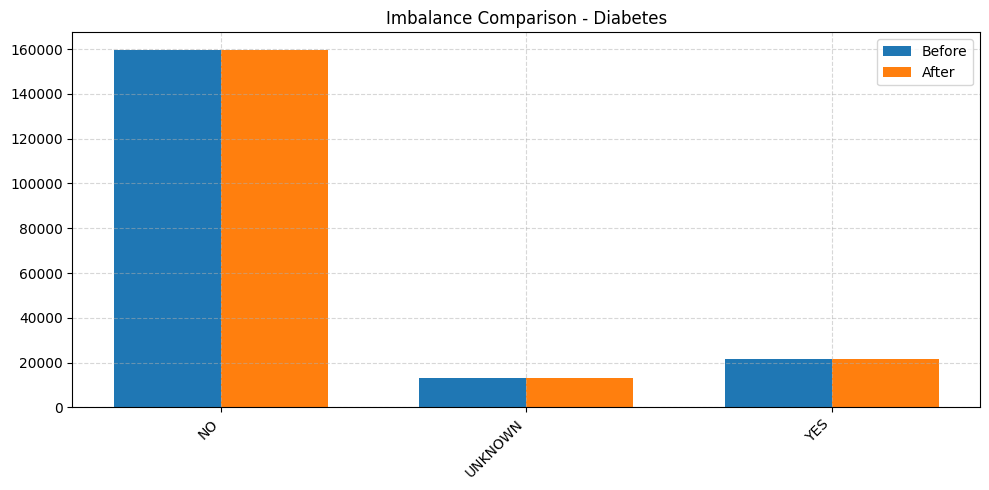

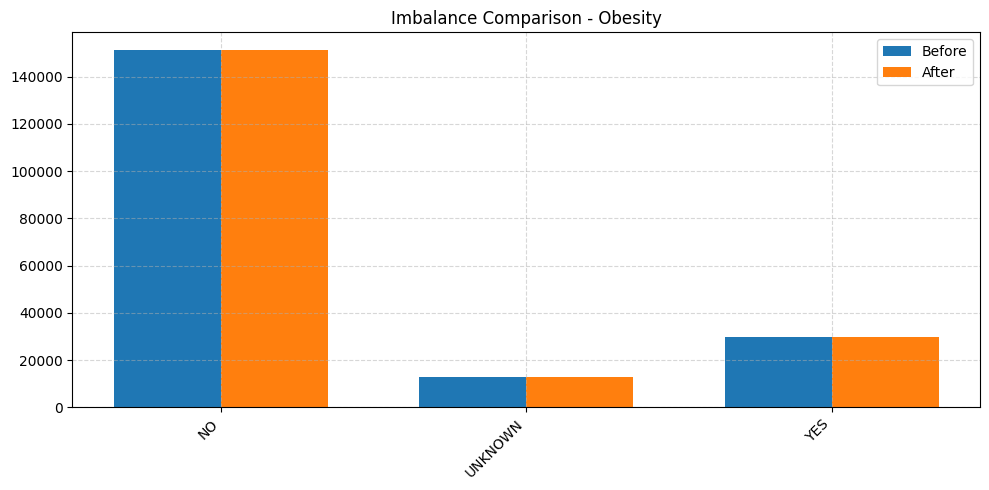

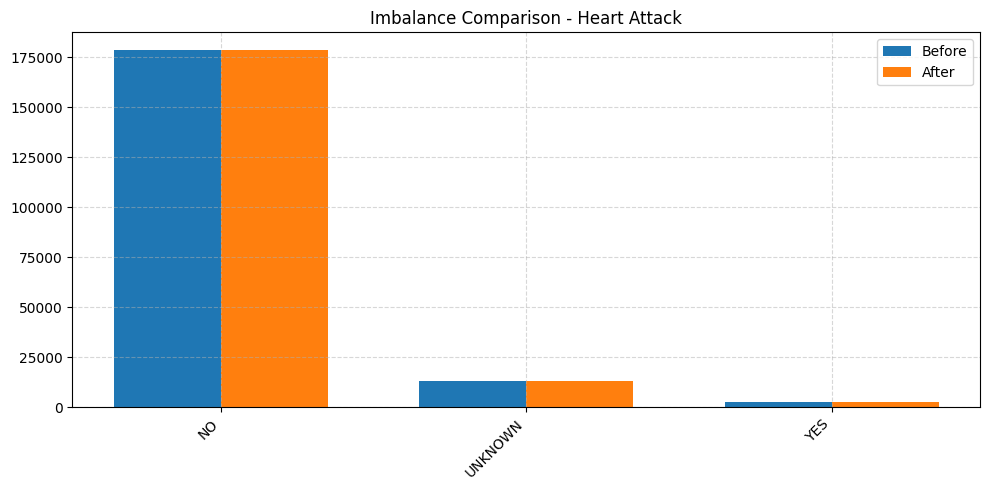

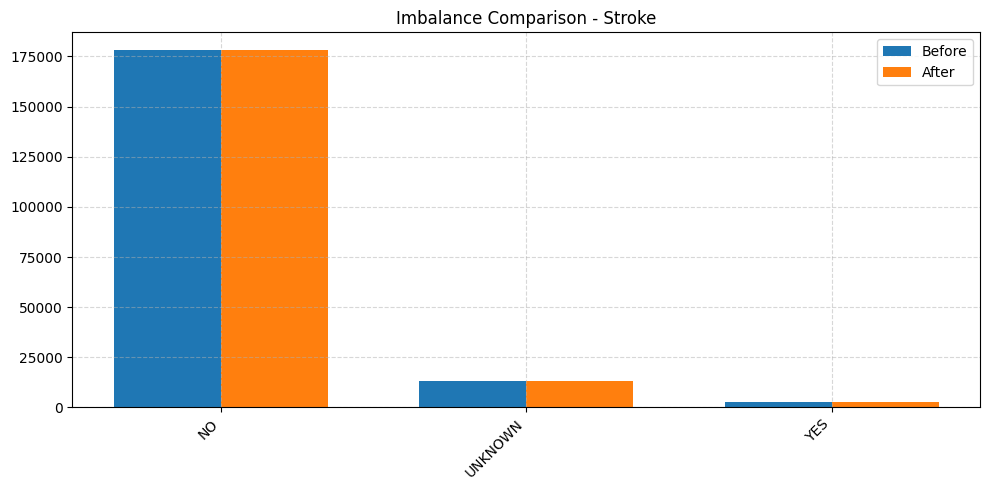

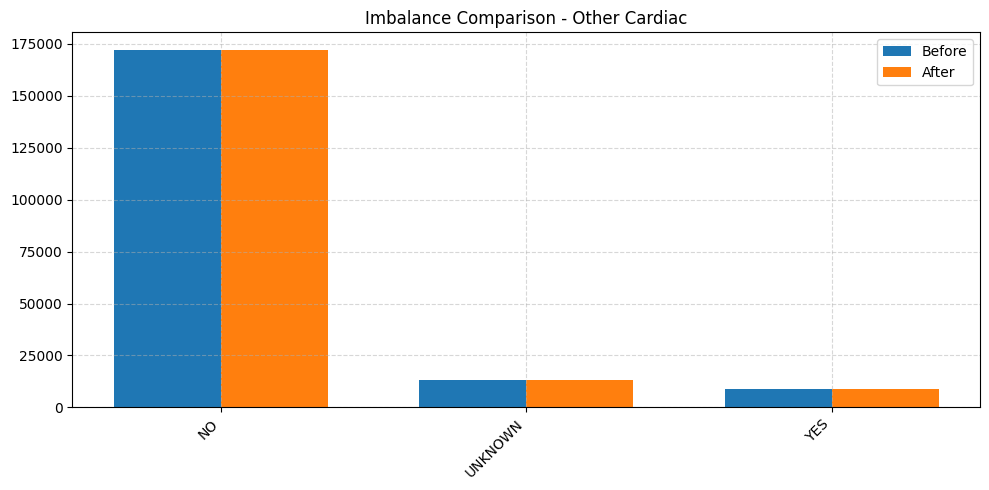

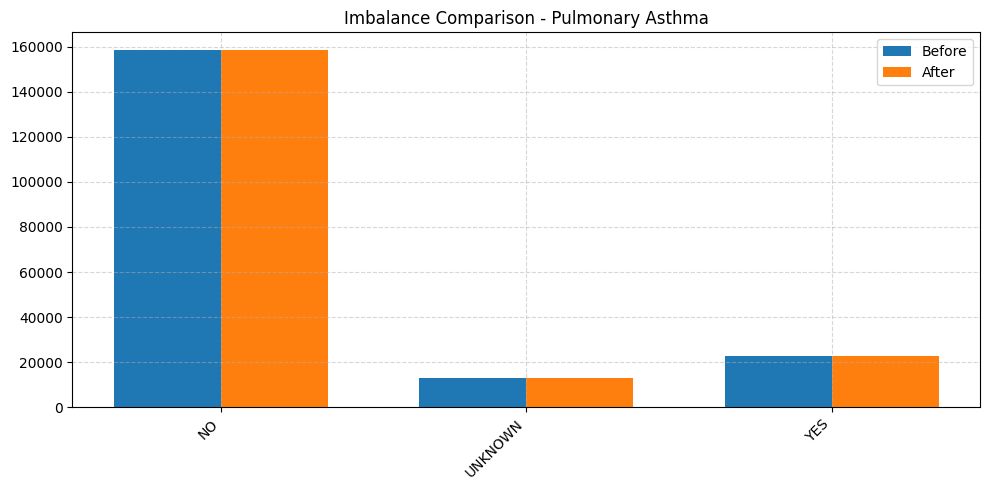

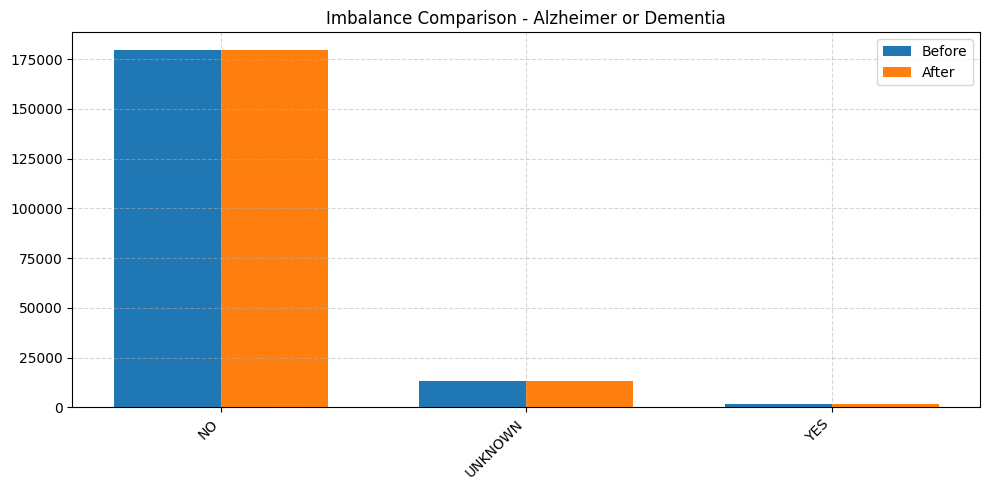

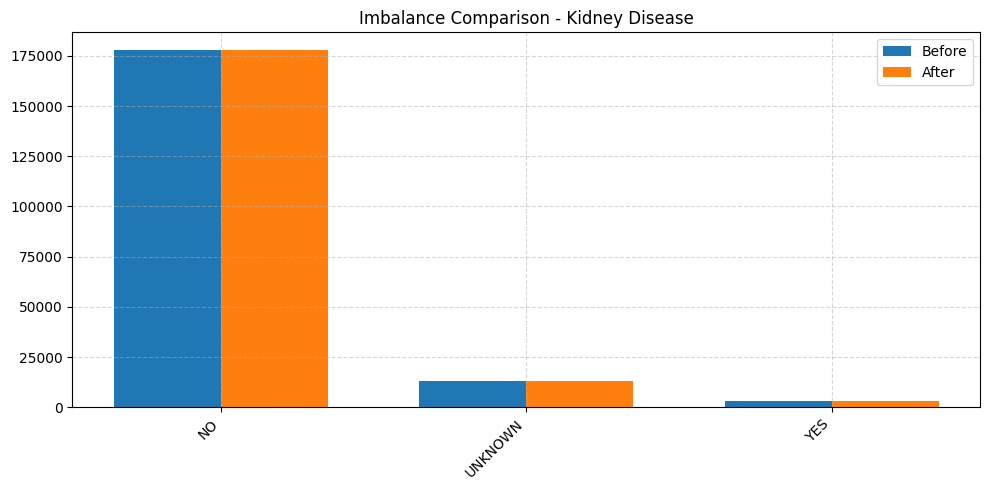

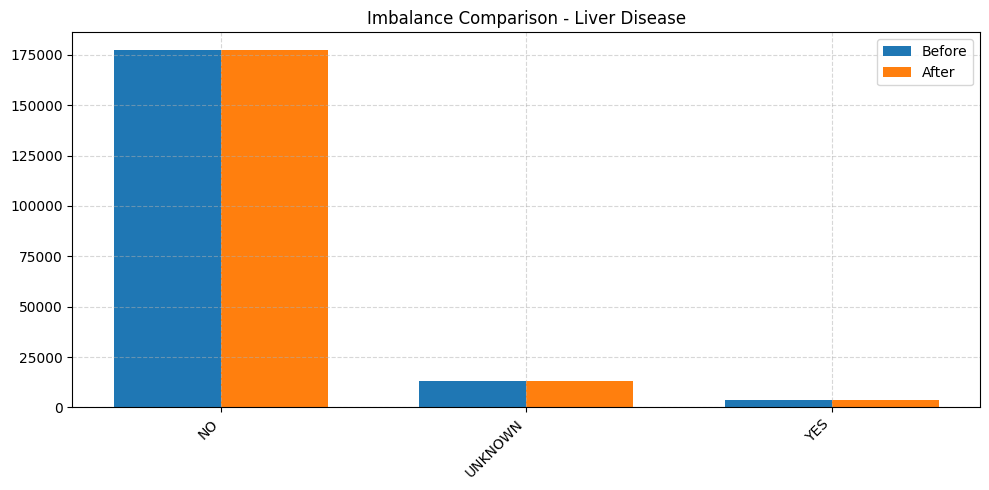

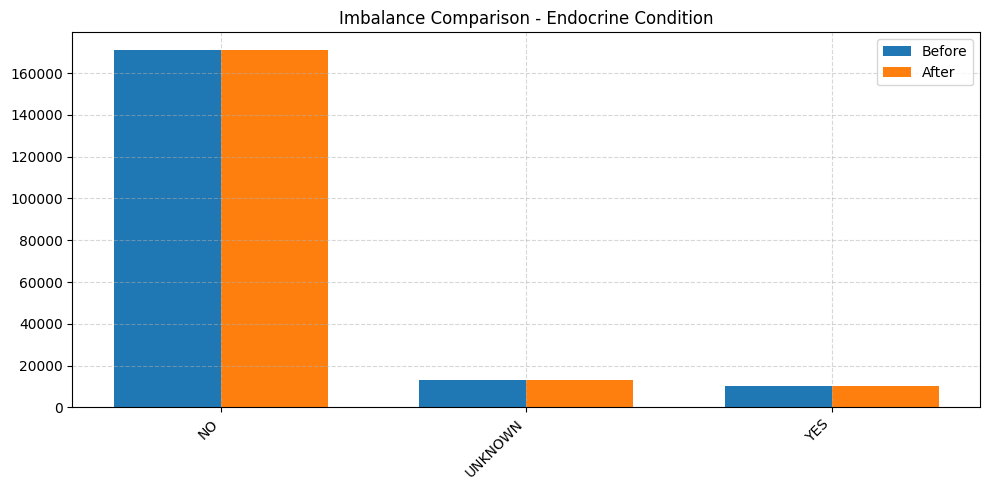

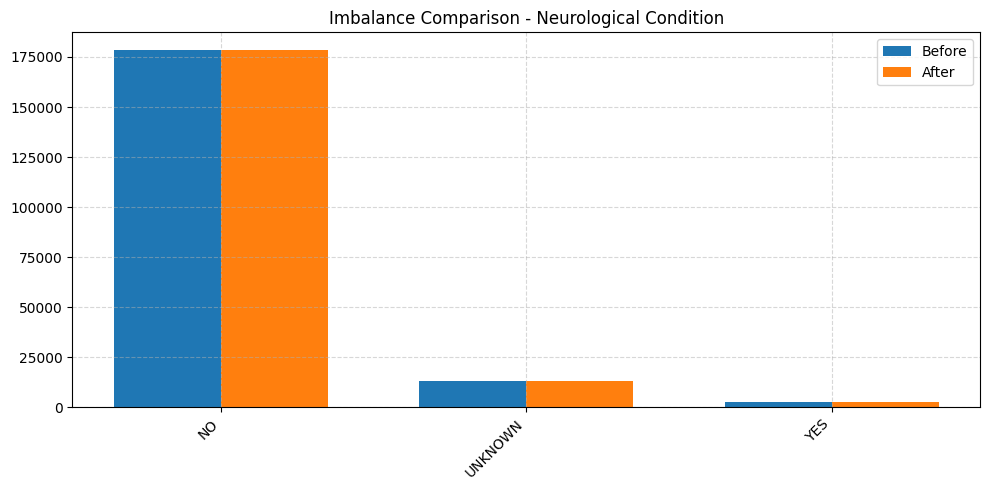

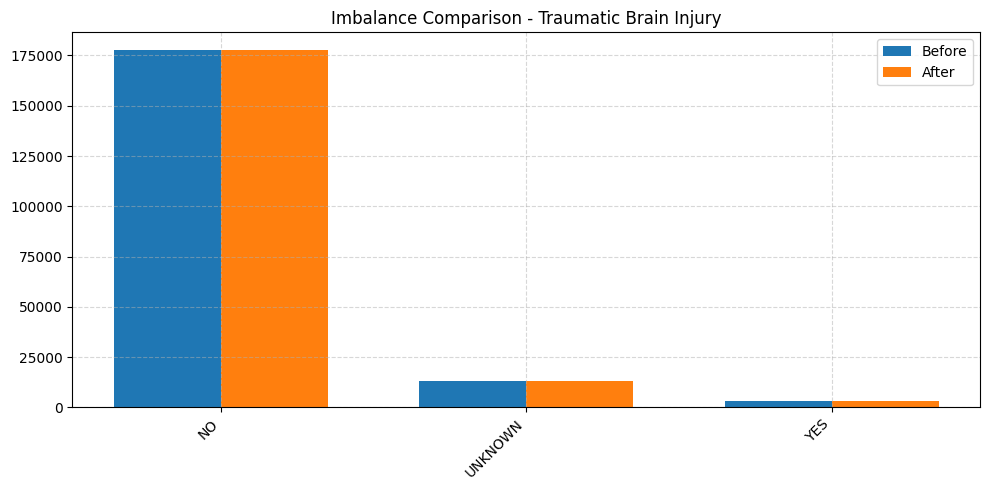

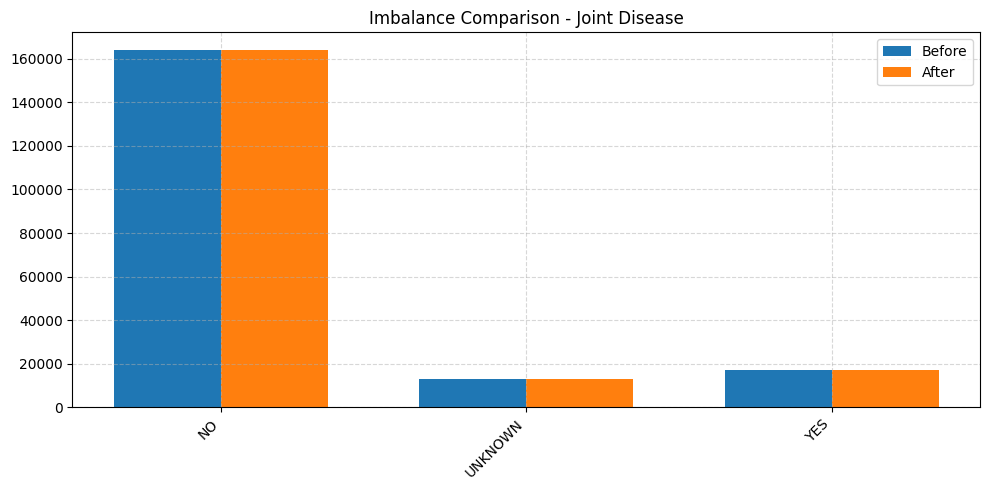

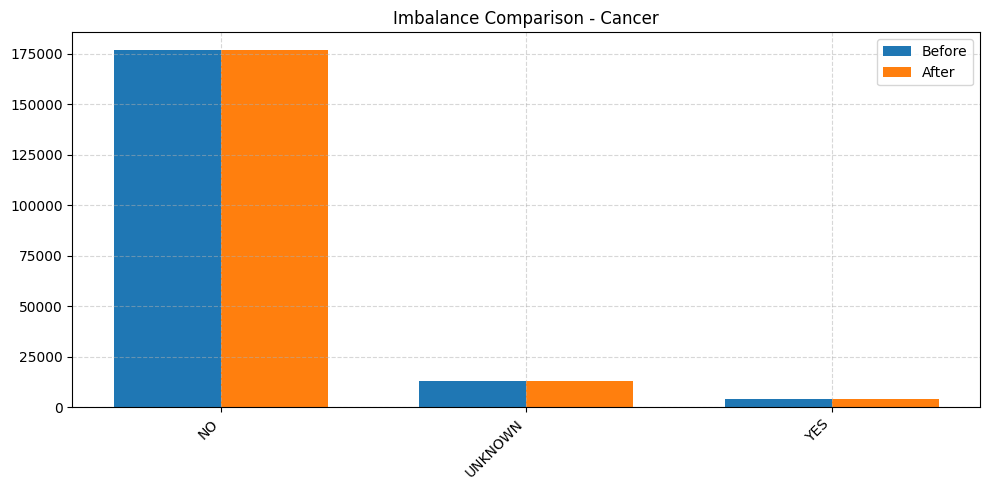

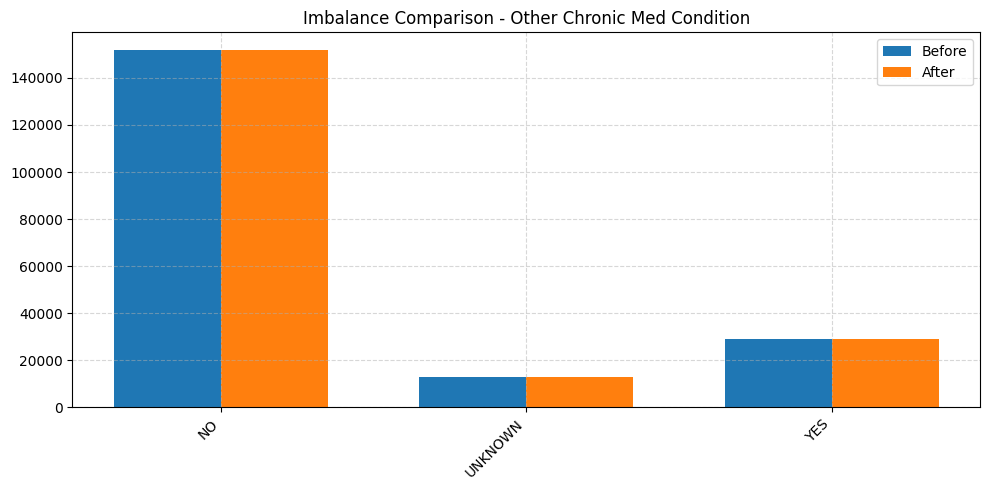

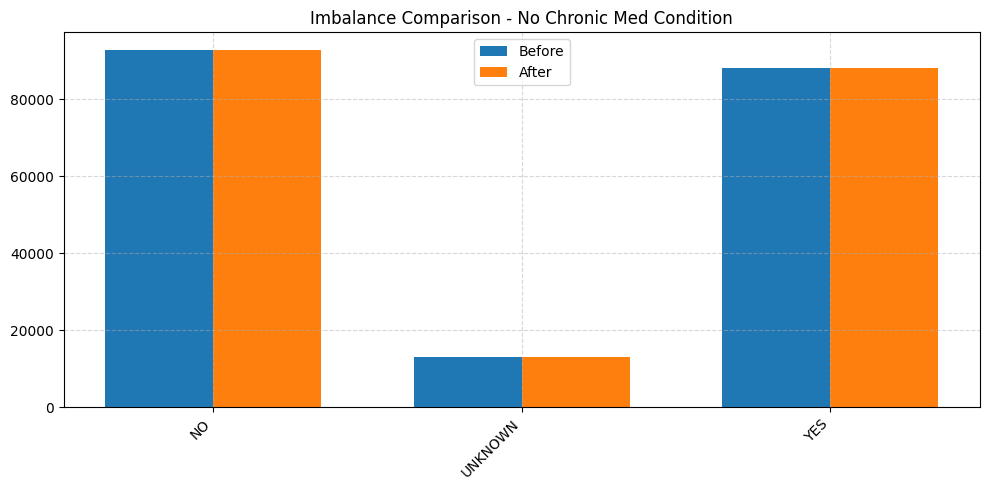

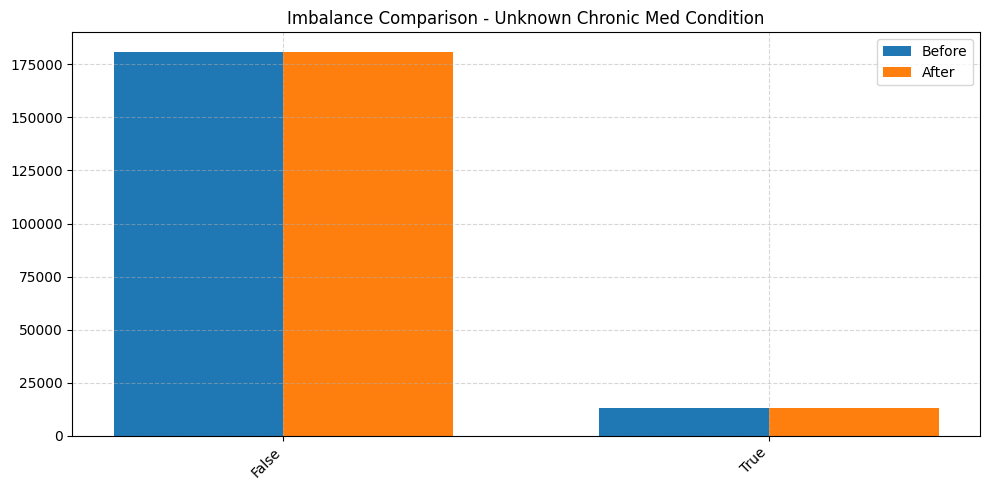

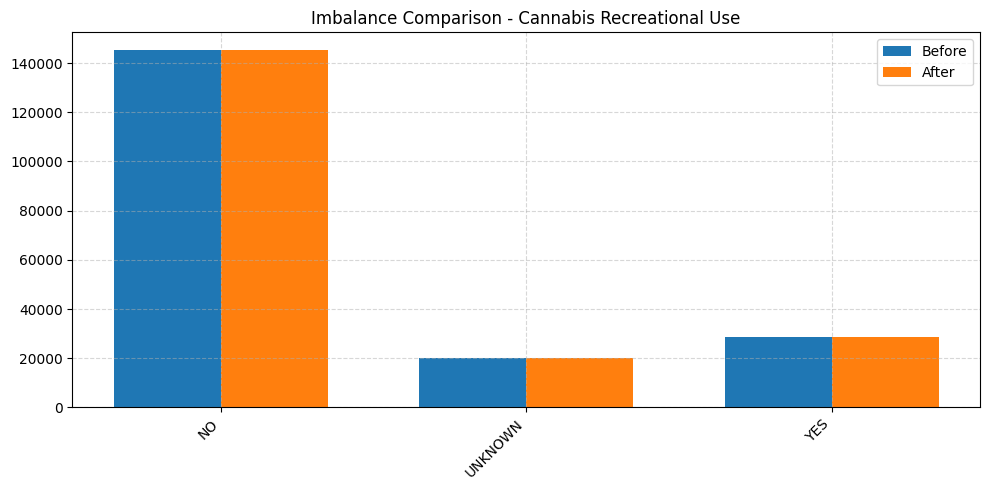

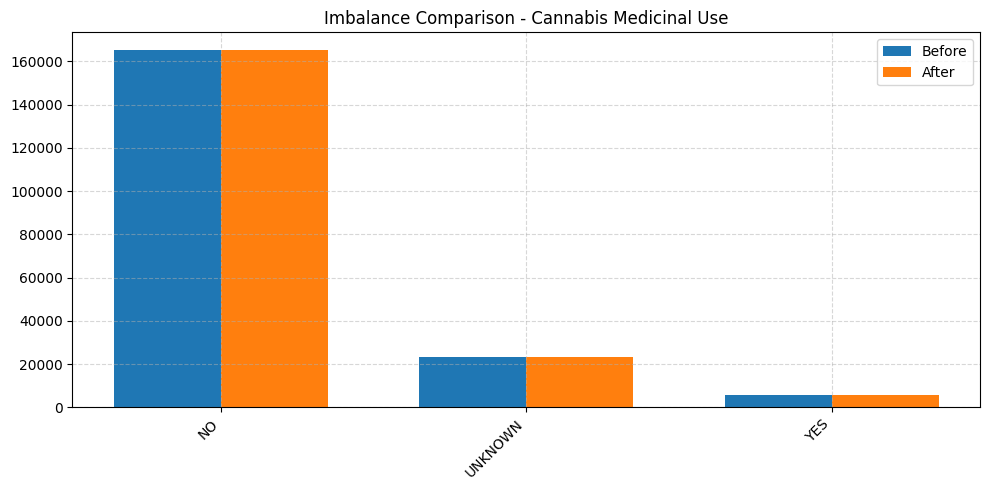

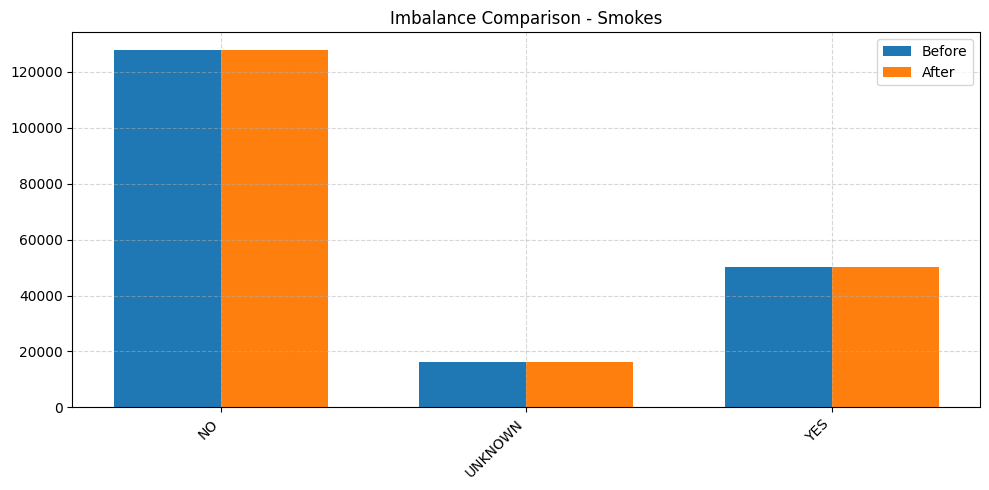

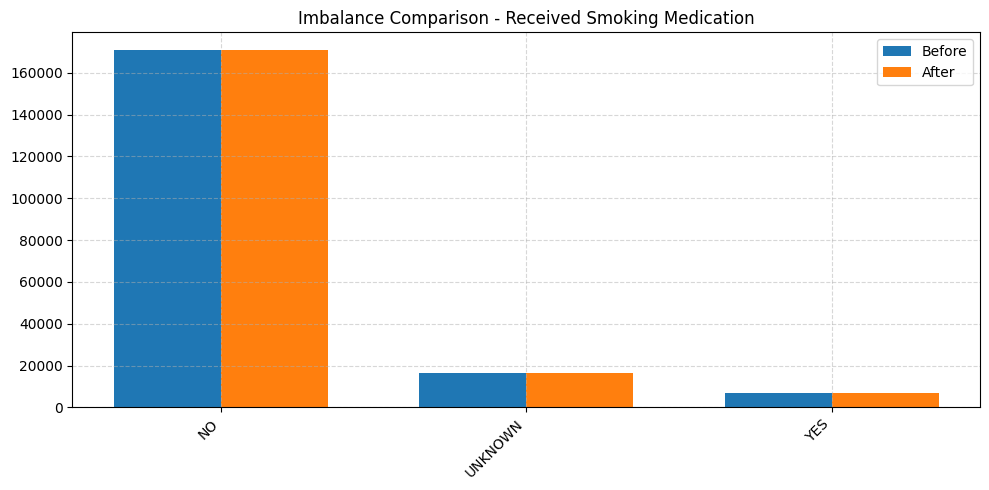

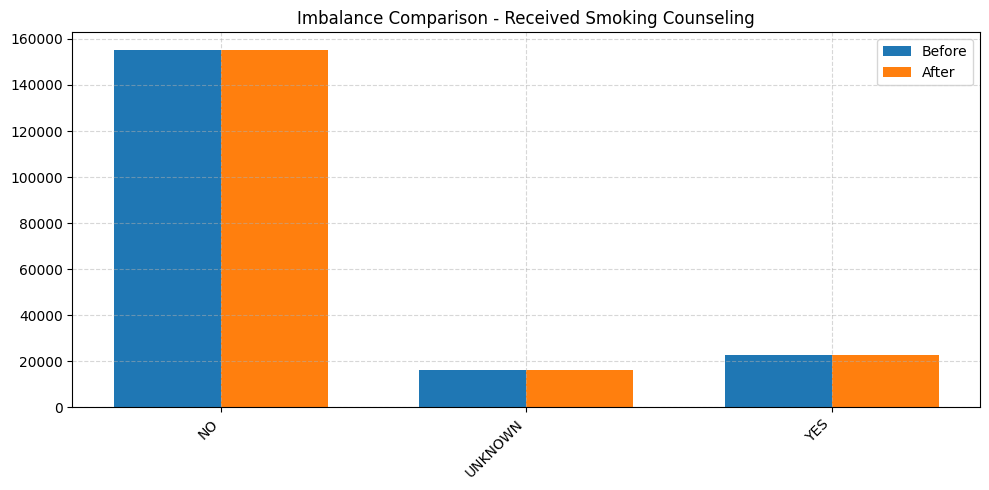

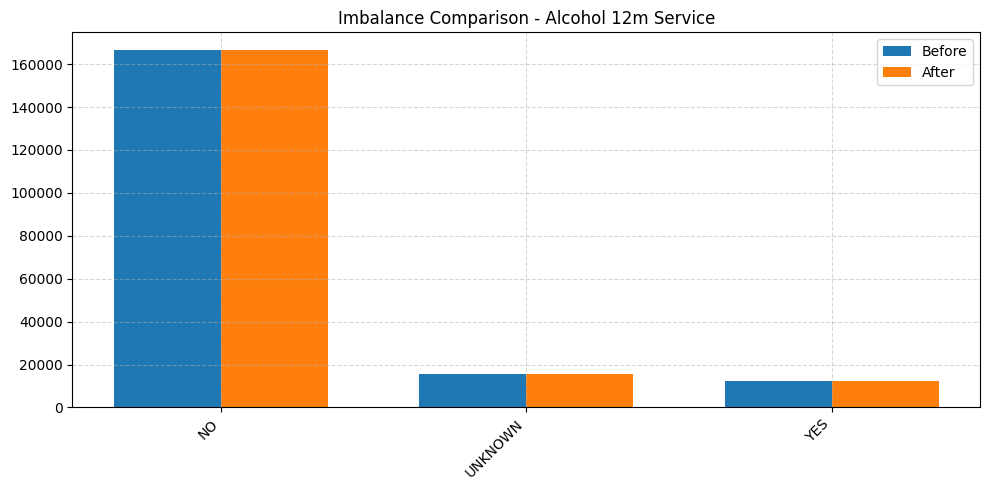

In [28]:
# Using Matplotlib

# Example list of columns you want to compare


columns_to_compare = new_clin_grp.columns[1:-2]

# Assuming: df_original = original DataFrame before aggregation
#           df_aggregated = DataFrame after aggregation

for col in columns_to_compare:
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Original counts
    original_counts = new_clin_grp[col].value_counts().sort_index()
    
    # Aggregated counts
    aggregated_counts = Clinical_cat_agg[col].value_counts().sort_index()
    
    # Align index (union of both sets of categories)
    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    x = range(len(all_categories))
    width = 0.35

    ax.bar(x, original_counts, width=width, label='Before', align='center')
    ax.bar([i + width for i in x], aggregated_counts, width=width, label='After', align='center')

    ax.set_xticks([i + width / 2 for i in x])
    ax.set_xticklabels(all_categories, rotation=45, ha='right')
    ax.set_title(f'Imbalance Comparison - {col}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()


In [35]:
for col in columns_to_compare:
    original_counts = new_clin_grp[col].value_counts().sort_index()
    aggregated_counts = Clinical_cat_agg[col].value_counts().sort_index()

    all_categories = sorted(set(original_counts.index).union(set(aggregated_counts.index)))
    original_counts = original_counts.reindex(all_categories, fill_value=0)
    aggregated_counts = aggregated_counts.reindex(all_categories, fill_value=0)

    fig = go.Figure(data=[
        go.Bar(name='Before', x=all_categories, y=original_counts, marker_color='indianred'),
        go.Bar(name='After', x=all_categories, y=aggregated_counts, marker_color='steelblue')
    ])

    fig.update_layout(
        title=f'Imbalance Comparison - {col}',
        barmode='group',
        xaxis=dict(
            title=col,
            tickangle=90,
            tickfont=dict(size=8)  #This line controls the font size of x labels
        ),
        yaxis_title='Count',
        template='plotly_white',
        height=500
    )

    fig.show()

### Feature Engeneering clinical data

In [37]:
def diagnosis_class(row):
    principal = str(row['Principal Diagnosis Class']).strip().upper()
    additional = str(row['Additional Diagnosis Class']).strip().upper()

    mental_illness_labels = {
        'MENTAL ILLNESS'
    }

    not_mi_labels = {
        'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'
    }

    no_additional_labels = {
        'NO ADDITIONAL DIAGNOSIS'
    }


    # Group MENTAL ILLNESS
    if 'MENTAL ILLNESS' in (principal, additional):
        return 'MENTAL ILLNESS'
    
    if (principal in mental_illness_labels and additional in 
        not_mi_labels
    ):
         return 'MENTAL ILLNESS'

    # Group NOT MI/DEVELOPMENT...
    if (principal in  not_mi_labels and additional in 
        not_mi_labels | {'UNKNOWN', 'NO ADDITIONAL DIAGNOSIS'}
    ):
        return 'NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/DISORDER'

    # Group NO ADDITIONAL DIAGNOSIS
    if (principal in {'NO ADDITIONAL DIAGNOSIS', 'UNKNOWN'} and
        additional == 'NO ADDITIONAL DIAGNOSIS'):
        return 'NO ADDITIONAL DIAGNOSIS'


    # Fallback
    return 'UNKNOWN'

In [38]:
def disorder_group(row):
    # Get and normalize values
    values = [
        str(row['Alcohol Related Disorder']).strip().upper(),
        str(row['Drug Substance Disorder']).strip().upper(),
        str(row['Opioid Related Disorder']).strip().upper()
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'ALCOHOL/DRUG DISORDER'
    elif no_count == 3:
        return 'NO DISORDER'
    elif no_count == 2 and unknown_count == 1:
        return 'NO DISORDER'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [39]:
def mentaldisability_group(row):
    cols = [
        row['Intellectual Disability'],
        row['Autism Spectrum'],
        row['Other Developmental Disability']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'INTELECTUAL/AUTISM/DEVELOP DISABILITY'
    elif no_count == 3:
        return 'NO DISABILITY'
    elif no_count == 2 and unknown_count == 1:
        return 'NO DISABILITY'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

##### PHYSICAL CLINICAL VARIABLES

In [40]:
def Impairment_group(row):
    impairments = [
        row['Mobility Impairment Disorder'],
        row['Hearing Impairment'],
        row['Visual Impairment'],
        row['Speech Impairment']
    ]

    # Normalize values (remove spaces and uppercase)
    values = [str(val).strip().upper() for val in impairments]

    yes_count = values.count('YES')
    unknown_count = values.count('UNKNOWN')
    no_count = values.count('NO')

    # Logic:
    if yes_count >= 1:
        return 'PHYSICAL IMPAIRMENT'
    elif no_count == 3 and unknown_count == 1:
        return 'NO PHYSICAL IMPAIRMENT'
    elif no_count == 4:
        return 'NO PHYSICAL IMPAIRMENT'
    elif unknown_count == 4:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [41]:
def chro_group(row):
    # List of chronic condition columns (up to Unknown Chronic Med Condition)
    chronic_conditions = [
        'Hyperlipidemia',
        'High Blood Pressure',
        'Diabetes',
        'Obesity',
        'Heart Attack',
        'Stroke',
        'Other Cardiac',
        'Pulmonary Asthma',
        'Alzheimer or Dementia',
        'Kidney Disease',
        'Liver Disease',
        'Endocrine Condition',
        'Neurological Condition',
        'Traumatic Brain Injury',
        'Joint Disease',
        'Cancer',
        'Other Chronic Med Condition',
        'Unknown Chronic Med Condition'
    ]

      # Add special column
    all_conditions = chronic_conditions + ['No Chronic Med Condition']

    # Normalizing
    values = [str(row.get(col, '')).strip().upper() for col in all_conditions]

    # Count if any of the chronic conditions are marked as 'YES' or 'TRUE'
    has_chronic = any(str(row[col]).strip().upper() in ('YES', 'TRUE') for col in chronic_conditions)

    # Check the special "No Chronic Med Condition" column
    no_chronic = str(row.get('No Chronic Med Condition', '')).strip().upper() in ('YES', 'TRUE')

    # all variables chronic and "no chronic" are UNKNOWN
    all_unknown = all(val == 'UNKNOWN' for val in values)

    if has_chronic:
        return 'CHRONICAL MEDICAL CONDITION'
    elif no_chronic:
        return 'NO CHRONICAL MEDICAL CONDITION'
    elif all_unknown:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [49]:
## uso canabis 
def usocanabis_group(row):
    # Get and normalize values
    values = [
        str(row['Cannabis Recreational Use']).strip().upper(),
        str(row['Cannabis Medicinal Use']).strip().upper()  
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'Use Cannabis Medical/recreational'
    elif no_count == 2:
        return 'No use cannabis'
    elif no_count == 1 and unknown_count == 1:
        return 'No use cannabis'
    elif unknown_count == 2:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [42]:
## smoking counseling or medication
def smokingtreat_group(row):
    # Get and normalize values
    values = [
        str(row['Received Smoking Medication']).strip().upper(),
        str(row['Received Smoking Counseling']).strip().upper()
    ]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'Received Smoking Medication/counseling'
    elif no_count == 2:
        return 'No Received Smoking Medication/counseling'
    elif no_count == 1 and unknown_count == 1:
        return 'No Received Smoking Medication/counseling'
    elif unknown_count == 2:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [43]:
### service alcohol/opiod/drug substance 

def servicedrugalcohol_group(row):
    cols = [
        row['Alcohol 12m Service'],
        row['Opioid 12m Service'],
        row['Drug/Substance 12m Service']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'SERVICE ALCOHOL DRUG USE'
    elif no_count == 3:
        return 'NO SERVICE ALCOHOL DRUG USE'
    elif no_count == 2 and unknown_count == 1:
        return 'NO SERVICE ALCOHOL DRUG USE'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'


In [44]:
# indicator asociated chronic disease

def Othertestchronic_group(row):
    cols = [
        row['Hyperlipidemia'],
        row['High Blood Pressure'],
        row['Obesity']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif no_count == 3:
        return 'NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [45]:
# heart chronic conditions 

def Heartchronic_group(row):
    cols = [
        row['Heart Attack'],
        row['Other Cardiac'],
        row['Stroke']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, HEART CHRONIC ILLNESS'
    elif no_count == 3:
        return 'NO, HEART CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, HEART CHRONIC ILLNESS'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [46]:
# brain chronic condition

def Brainchronic_group(row):
    cols = [
        row['Alzheimer or Dementia'],
        row['Neurological Condition'],
        row['Traumatic Brain Injury']
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    yes_count = values.count('YES')
    no_count = values.count('NO')
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, BRAIN CHRONIC ILLNESS'
    elif no_count == 3:
        return 'NO, BRAIN CHRONIC ILLNESS'
    elif no_count == 2 and unknown_count == 1:
        return 'NO, BRAIN CHRONIC ILLNESS'
    elif unknown_count == 3:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [47]:
# other  chronic conditions 
def Otherchron_group(row):
    # List of chronic condition columns (up to Unknown Chronic Med Condition)
    cols = [
        row['Diabetes'],
        row['Pulmonary Asthma'],
        row['Kidney Disease'],
        row['Liver Disease'],
        row['Endocrine Condition'],
        row['Joint Disease'],
        row['Cancer'],
        row['Other Chronic Med Condition'],
        row['Unknown Chronic Med Condition'],
    ]

    # Normalize inputs
    values = [str(val).strip().upper() for val in cols]

    # Count TRUE or YES, FALSE or NO, and UNKNOWN
    yes_count = sum(v in ['YES', 'TRUE'] for v in values)
    no_count = sum(v in ['NO', 'FALSE'] for v in values)
    unknown_count = values.count('UNKNOWN')

    if yes_count >= 1:
        return 'YES, CHRONIC ILLNESS'
    elif no_count == 9:
        return 'NO,  CHRONIC ILLNESS'
    elif no_count == 8 and unknown_count == 1:
        return 'NO,  CHRONIC ILLNESS'
    elif unknown_count >= 8:
        return 'UNKNOWN'
    else:
        return 'UNKNOWN'

In [50]:
#Apply
Clinical_cat_agg_feat_merg = Clinical_cat_agg.copy()


Clinical_cat_agg_feat_merg['Diagnosis'] = Clinical_cat_agg_feat_merg.apply(diagnosis_class, axis=1)

Clinical_cat_agg_feat_merg['Disorder Group'] = Clinical_cat_agg_feat_merg.apply(disorder_group, axis=1)

Clinical_cat_agg_feat_merg['Mental disability'] = Clinical_cat_agg_feat_merg.apply(mentaldisability_group, axis=1)

Clinical_cat_agg_feat_merg['Impairment Group'] = Clinical_cat_agg_feat_merg.apply(Impairment_group, axis=1)

Clinical_cat_agg_feat_merg['Chronical diseases'] = Clinical_cat_agg_feat_merg.apply(chro_group, axis=1)

Clinical_cat_agg_feat_merg['Users Canabis'] = Clinical_cat_agg_feat_merg.apply(usocanabis_group, axis=1)

Clinical_cat_agg_feat_merg['Smoking treatment'] = Clinical_cat_agg_feat_merg.apply(smokingtreat_group, axis=1)

Clinical_cat_agg_feat_merg['Service_drug_alcohol_opiod'] = Clinical_cat_agg_feat_merg.apply(servicedrugalcohol_group, axis=1)

Clinical_cat_agg_feat_merg['Other_testchronic_group'] = Clinical_cat_agg_feat_merg.apply(Othertestchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Heartchronic'] = Clinical_cat_agg_feat_merg.apply(Heartchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Brainchronic'] = Clinical_cat_agg_feat_merg.apply(Brainchronic_group, axis=1)

Clinical_cat_agg_feat_merg['Otherchron_group'] = Clinical_cat_agg_feat_merg.apply(Otherchron_group, axis=1)



In [52]:
## validation one group

selected_df = Clinical_cat_agg_feat_merg[['Principal Diagnosis Class','Additional Diagnosis Class','Diagnosis']]
selected_df.head(50)

,Principal Diagnosis Class,Additional Diagnosis Class,Diagnosis
0,MENTAL ILLNESS,UNKNOWN,MENTAL ILLNESS
1,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
2,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,MENTAL ILLNESS
3,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,MENTAL ILLNESS
4,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
5,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
6,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
7,MENTAL ILLNESS,MENTAL ILLNESS,MENTAL ILLNESS
8,MENTAL ILLNESS,NOT MI/DEVELOPMENT/ORGANIC/SUBSTANCEADDICTIVE/...,MENTAL ILLNESS
9,MENTAL ILLNESS,NO ADDITIONAL DIAGNOSIS,MENTAL ILLNESS


In [53]:
## deleten columns that were joined previously
Clinical_cat_agg_feat_merg.drop(columns=['Intellectual Disability', 'Autism Spectrum','Other Developmental Disability', 'Alcohol Related Disorder',
'Drug Substance Disorder', 'Opioid Related Disorder',
 'Principal Diagnosis Class', 'Additional Diagnosis Class',
'Mobility Impairment Disorder', 'Hearing Impairment', 'Visual Impairment',
'Speech Impairment', 'Hyperlipidemia', 'High Blood Pressure', 'Diabetes',
'Obesity', 'Heart Attack', 'Stroke', 'Other Cardiac', 'Pulmonary Asthma',
'Alzheimer or Dementia', 'Kidney Disease', 'Liver Disease',
'Endocrine Condition', 'Neurological Condition', 'Traumatic Brain Injury',
'Joint Disease', 'Cancer', 'Other Chronic Med Condition',
'No Chronic Med Condition', 'Unknown Chronic Med Condition',
'Cannabis Recreational Use', 'Cannabis Medicinal Use',
'Received Smoking Medication', 'Received Smoking Counseling',
'Alcohol 12m Service', 'Opioid 12m Service', 'Drug/Substance 12m Service'], inplace=True)

Clinical_cat_agg_feat_merg.head()

,Mental Illness,Serious Mental Illness,Smokes,Diagnosis,Disorder Group,Mental disability,Impairment Group,Chronical diseases,Users Canabis,Smoking treatment,Service_drug_alcohol_opiod,Other_testchronic_group,Heartchronic,Brainchronic,Otherchron_group
0,YES,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
1,YES,YES,NO,MENTAL ILLNESS,NO DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
2,YES,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,INTELECTUAL/AUTISM/DEVELOP DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,Use Cannabis Medical/recreational,No Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
3,YES,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,NO CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,SERVICE ALCOHOL DRUG USE,"NO, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"
4,YES,YES,YES,MENTAL ILLNESS,ALCOHOL/DRUG DISORDER,NO DISABILITY,NO PHYSICAL IMPAIRMENT,CHRONICAL MEDICAL CONDITION,No use cannabis,Received Smoking Medication/counseling,NO SERVICE ALCOHOL DRUG USE,"YES, HYPERLIPIDEMIA/HIGHBLOODPRESSURE/OBESITY","NO, HEART CHRONIC ILLNESS","NO, BRAIN CHRONIC ILLNESS","NO, CHRONIC ILLNESS"


In [ ]:
## printing the number of variables in clinical data
print(Clinical_cat_agg_feat_merg.shape)

(194117, 15)
